In [32]:
from IPython.display import Image
import pandas as pd
import seaborn as sns
from datetime import date
import numpy as np
from IPython.display import Image
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.cm as cm
from matplotlib.colors import Normalize
from plotly.subplots import make_subplots
from matplotlib import rcParams
import IPython.display as display
import ipywidgets as widgets
from sklearn.preprocessing import StandardScaler
import matplotlib.image as mpimg

In [2]:
df=pd.read_csv('marketing_data.csv')
pd.set_option("display.max_columns", None)
df.set_index('ID',inplace=True)
df.sort_values(by='ID',inplace=True)

In [3]:
df[' Income ']=df[' Income '].str.replace('$', '')
df[' Income ']=df[' Income '].str.replace(',', '')
df[' Income ']=df[' Income '].astype(float)


<ipython-input-3-01f07421f258>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df[' Income ']=df[' Income '].str.replace('$', '')


In [4]:
df['Age']=np.nan
current_date = date.today() 
for i in range(2234):
    df['Age'].iloc[i]=current_date.year-df['Year_Birth'].iloc[i]


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
df1=df


<AxesSubplot:>

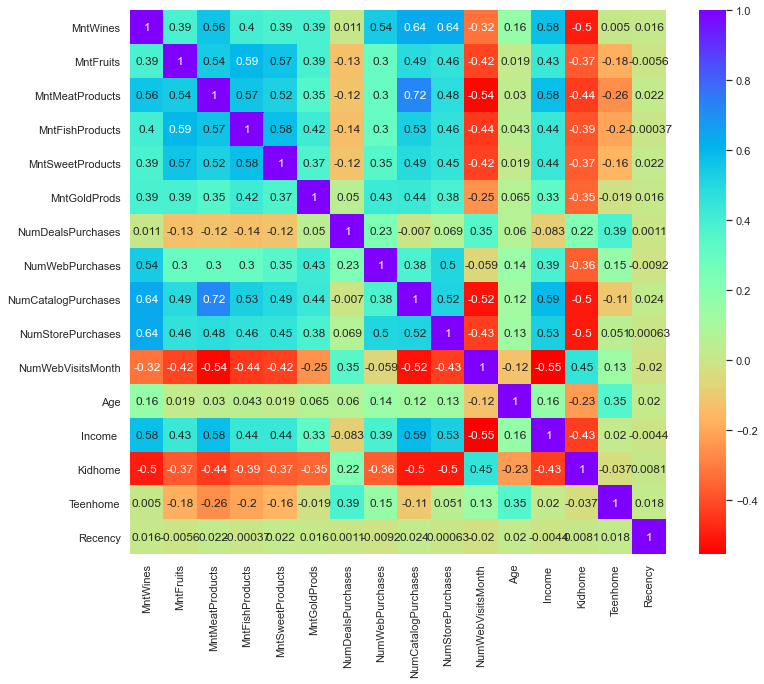

In [39]:
Item_Purchase=df1.loc[:,['MntWines','MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds','NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases','NumStorePurchases', 'NumWebVisitsMonth',
        'Age', ' Income ', 'Kidhome',
       'Teenhome', 'Recency']]
sns.set(rc={"figure.figsize":(12, 10)})
object= StandardScaler() 
scale = object.fit_transform(Item_Purchase)
IP=pd.DataFrame(scale,columns=['MntWines','MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds','NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases','NumStorePurchases', 'NumWebVisitsMonth',
        'Age', ' Income ', 'Kidhome',
       'Teenhome', 'Recency'])
sns.heatmap(IP.corr(),cmap='rainbow_r',annot=True)

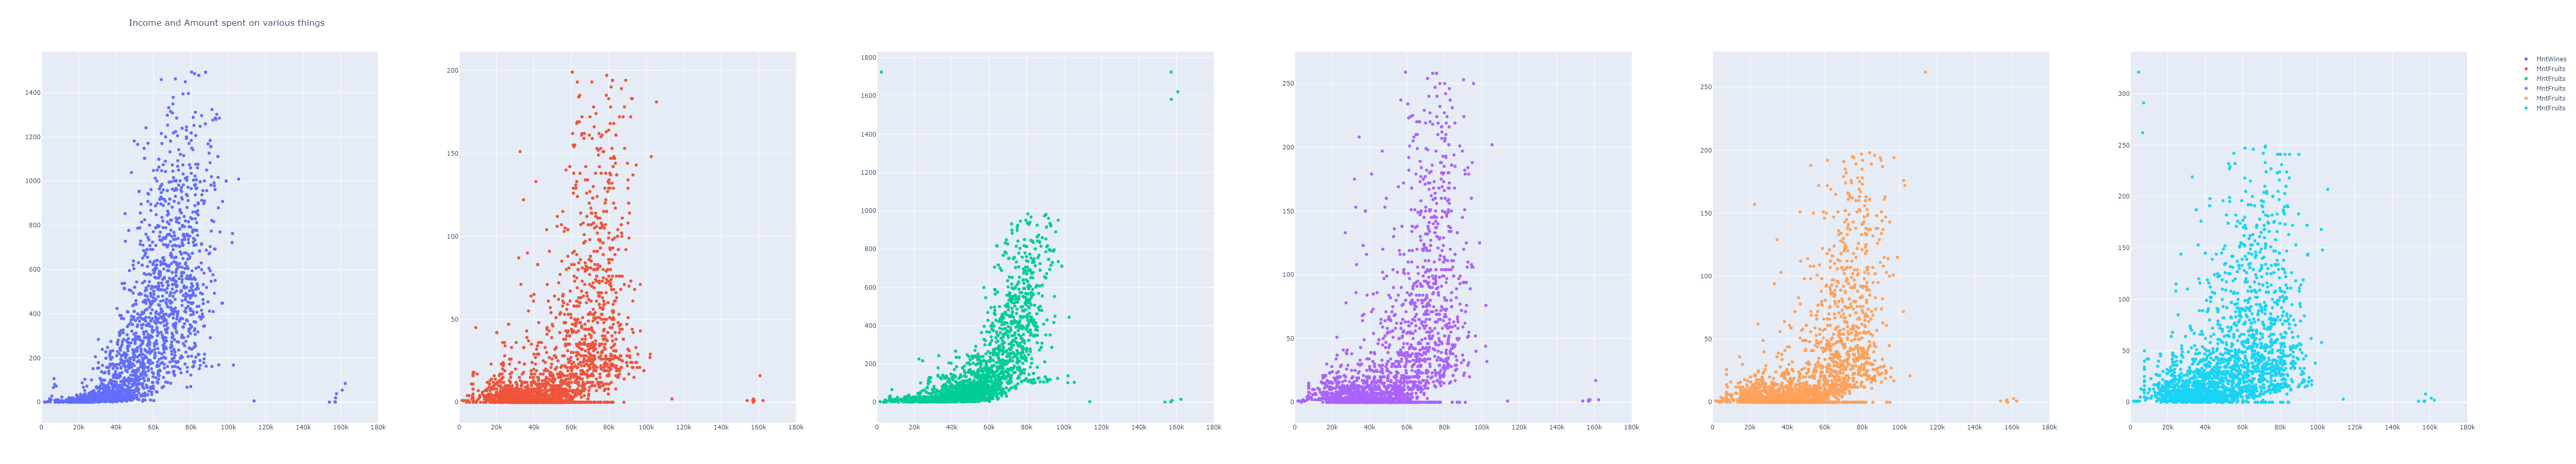

In [89]:
dfIC=df1.sort_values(by=' Income ')
dfIC=dfIC.dropna()
fig = make_subplots(rows=1, cols=6)
fig.add_trace(go.Scatter(x=dfIC[' Income '], y=dfIC['MntWines'], name='MntWines',mode='markers'),row=1,col=1)
fig.add_trace(go.Scatter(x=dfIC[' Income '], y=dfIC['MntFruits'], name='MntFruits',mode='markers'),row=1,col=2)
fig.add_trace(go.Scatter(x=dfIC[' Income '], y=dfIC['MntMeatProducts'], name='MntFruits',mode='markers'),row=1,col=3)
fig.add_trace(go.Scatter(x=dfIC[' Income '], y=dfIC['MntFishProducts'], name='MntFruits',mode='markers'),row=1,col=4)
fig.add_trace(go.Scatter(x=dfIC[' Income '], y=dfIC['MntSweetProducts'], name='MntFruits',mode='markers'),row=1,col=5)
fig.add_trace(go.Scatter(x=dfIC[' Income '], y=dfIC['MntGoldProds'], name='MntFruits',mode='markers'),row=1,col=6)
fig.update_xaxes(range = [0, 180000])
fig.update_layout(title_text="Income and Amount spent on various things")
fig.write_image("Income.png", width=5000, height=900)
Image(filename='Income.png')

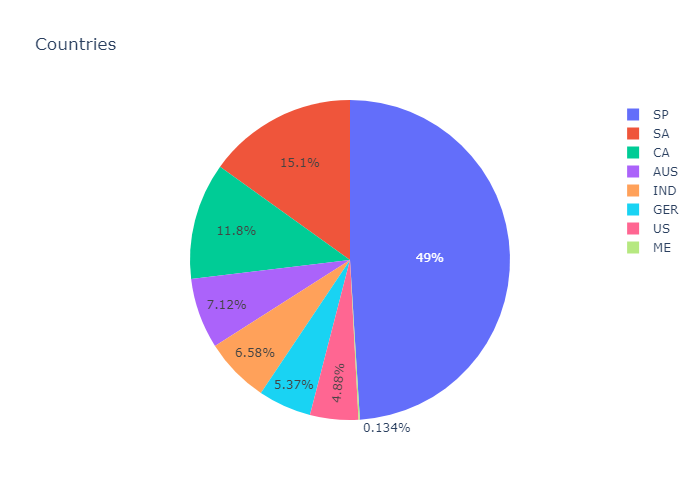

In [7]:
fig = px.pie(df1,names='Country',title='Countries')
fig.write_image("Countries.png")
Image(filename='Countries.png')

Distribution of the customers seems mainly comprise of mostly SP,SA,CA as the consititute about 75% for the sample space.

Distribution of the customers seems mainly comprise of people who have a degree.

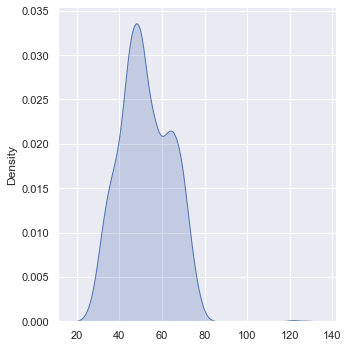

In [8]:
ax=sns.displot(np.array(df['Age']),kind="kde",fill=True)

This indicates that majority of the customers are between the age 40 and 60 when taking all the countries into consideration.

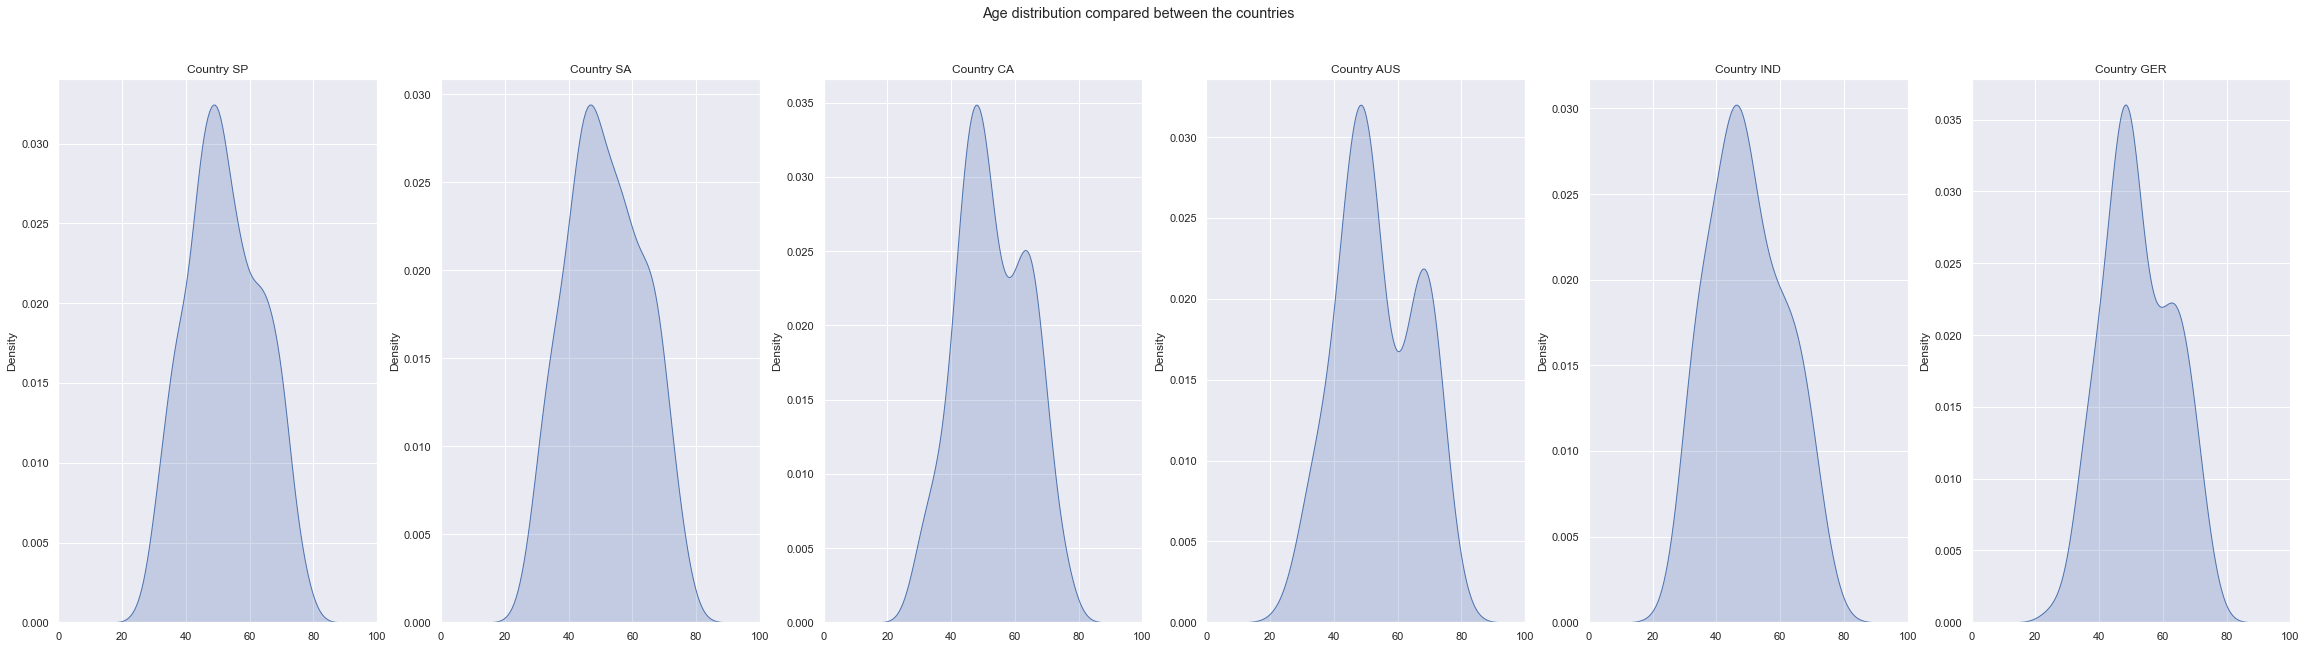

In [9]:
dfSP=df1.loc[df1['Country']=='SP']
dfSA=df1.loc[df1['Country']=='SA']
dfCA=df1.loc[df1['Country']=='CA']
dfAUS=df1.loc[df1['Country']=='AUS']
dfIND=df1.loc[df1['Country']=='IND']
dfGER=df1.loc[df1['Country']=='GER']
sns.set()
fig, axes = plt.subplots(1,6, figsize=(40,10))
fig.suptitle('Age distribution compared between the countries')
sns.kdeplot(np.array(dfSP['Age']),ax=axes[0],fill=True)
axes[0].set_title('Country SP')
sns.kdeplot(np.array(dfSA['Age']),ax=axes[1],fill=True)
axes[1].set_title('Country SA')
sns.kdeplot(np.array(dfCA['Age']),ax=axes[2],fill=True)
axes[2].set_title('Country CA')
sns.kdeplot(np.array(dfAUS['Age']),ax=axes[3],fill=True)
axes[3].set_title('Country AUS')
sns.kdeplot(np.array(dfIND['Age']),ax=axes[4],fill=True)
axes[4].set_title('Country IND')
sns.kdeplot(np.array(dfGER['Age']),ax=axes[5],fill=True)
axes[5].set_title('Country GER')
for ax in fig.axes:
    ax.set_xlim(0,100)        

<AxesSubplot:ylabel='Density'>

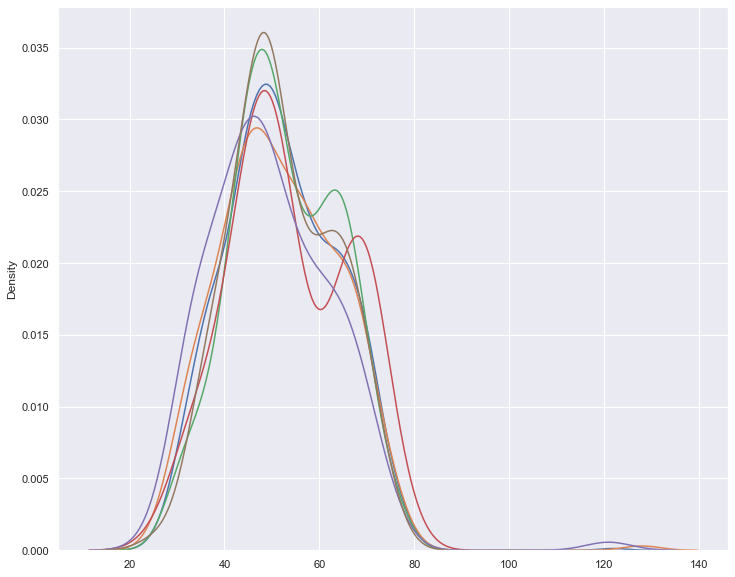

In [10]:
sns.kdeplot(np.array(dfSP['Age']),alpha=0.2)
sns.kdeplot(np.array(dfSA['Age']),alpha=0.2)
sns.kdeplot(np.array(dfCA['Age']),alpha=0.2)
sns.kdeplot(np.array(dfAUS['Age']),alpha=0.2)
sns.kdeplot(np.array(dfIND['Age']),alpha=0.2)
sns.kdeplot(np.array(dfGER['Age']),alpha=0.2)

Age distribution seems pretty similar accross the different countries 

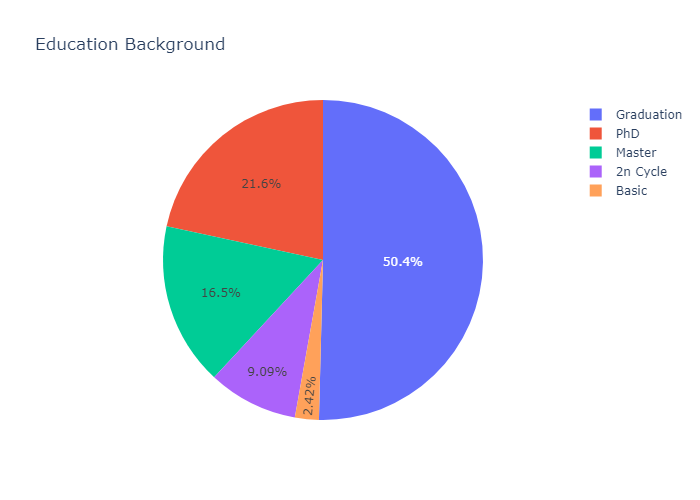

In [11]:
fig = px.pie(df,names='Education',title='Education Background')
fig.write_image("educationbg.png")
Image(filename='educationbg.png')

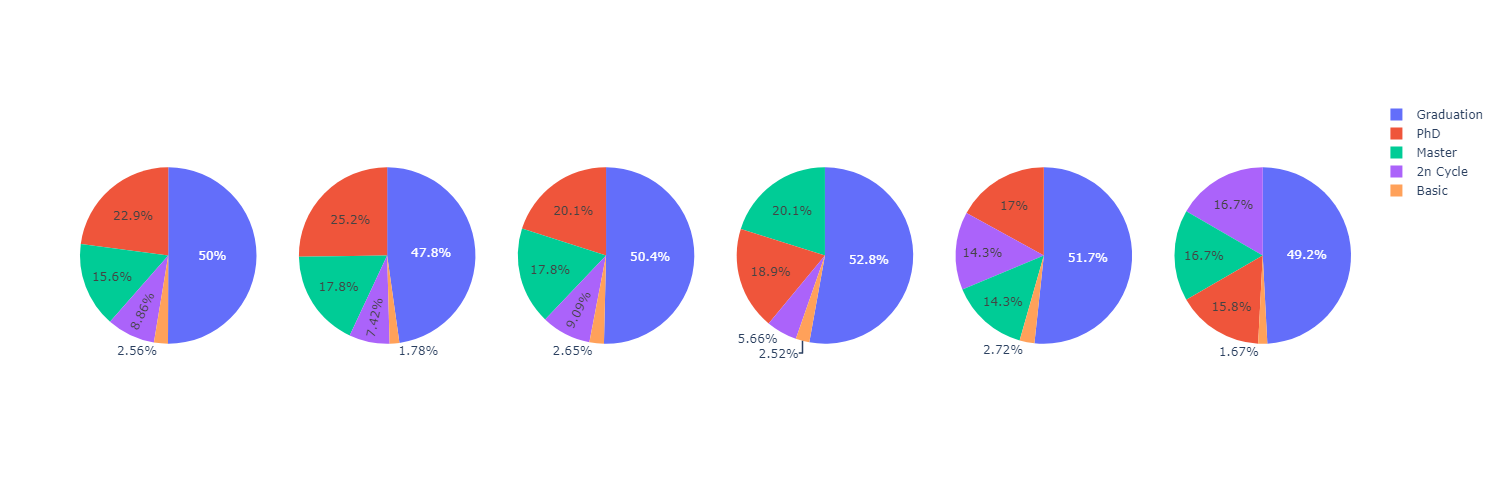

In [12]:
tempSP=dfSP.groupby('Education').count()
tempSA=dfSA.groupby('Education').count()
tempCA=dfCA.groupby('Education').count()
tempAUS=dfAUS.groupby('Education').count()
tempIND=dfIND.groupby('Education').count()
tempGER=dfGER.groupby('Education').count()

labels = ["2n Cycle	", "Basic", "Graduation", "Master", "PhD"]
specs=[[{'type':'domain'},{'type':'domain'},{'type':'domain'},{'type':'domain'},{'type':'domain'},{'type':'domain'}]]
fig = make_subplots(specs=specs,rows=1, cols=6,column_widths=[0.7, 0.7,0.7, 0.7,0.7, 0.7] )

fig.add_trace(go.Pie(labels=labels, values=np.array(tempSP['Marital_Status']), name="Country SP"), row=1, col=1)
fig.add_trace(go.Pie(labels=labels, values=np.array(tempSA['Marital_Status']),  name="Country SA"), row=1, col=2)
fig.add_trace(go.Pie(labels=labels, values=np.array(tempCA['Marital_Status']),  name="Country CA"), row=1, col=3)
fig.add_trace(go.Pie(labels=labels, values=np.array(tempAUS['Marital_Status']),  name="Country AUS"), row=1, col=4)
fig.add_trace(go.Pie(labels=labels, values=np.array(tempIND['Marital_Status']),  name="Country IND"), row=1, col=5)
fig.add_trace(go.Pie(labels=labels, values=np.array(tempGER['Marital_Status']),  name="Country GER"), row=1, col=6)
fig.write_image("EducationCountries.png", width=1500, height=500)
Image(filename='EducationCountries.png')

Text(0.5, 1.0, 'Eduaction GER')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning:

Glyph 9 missing from current font.

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning:

Glyph 9 missing from current font.



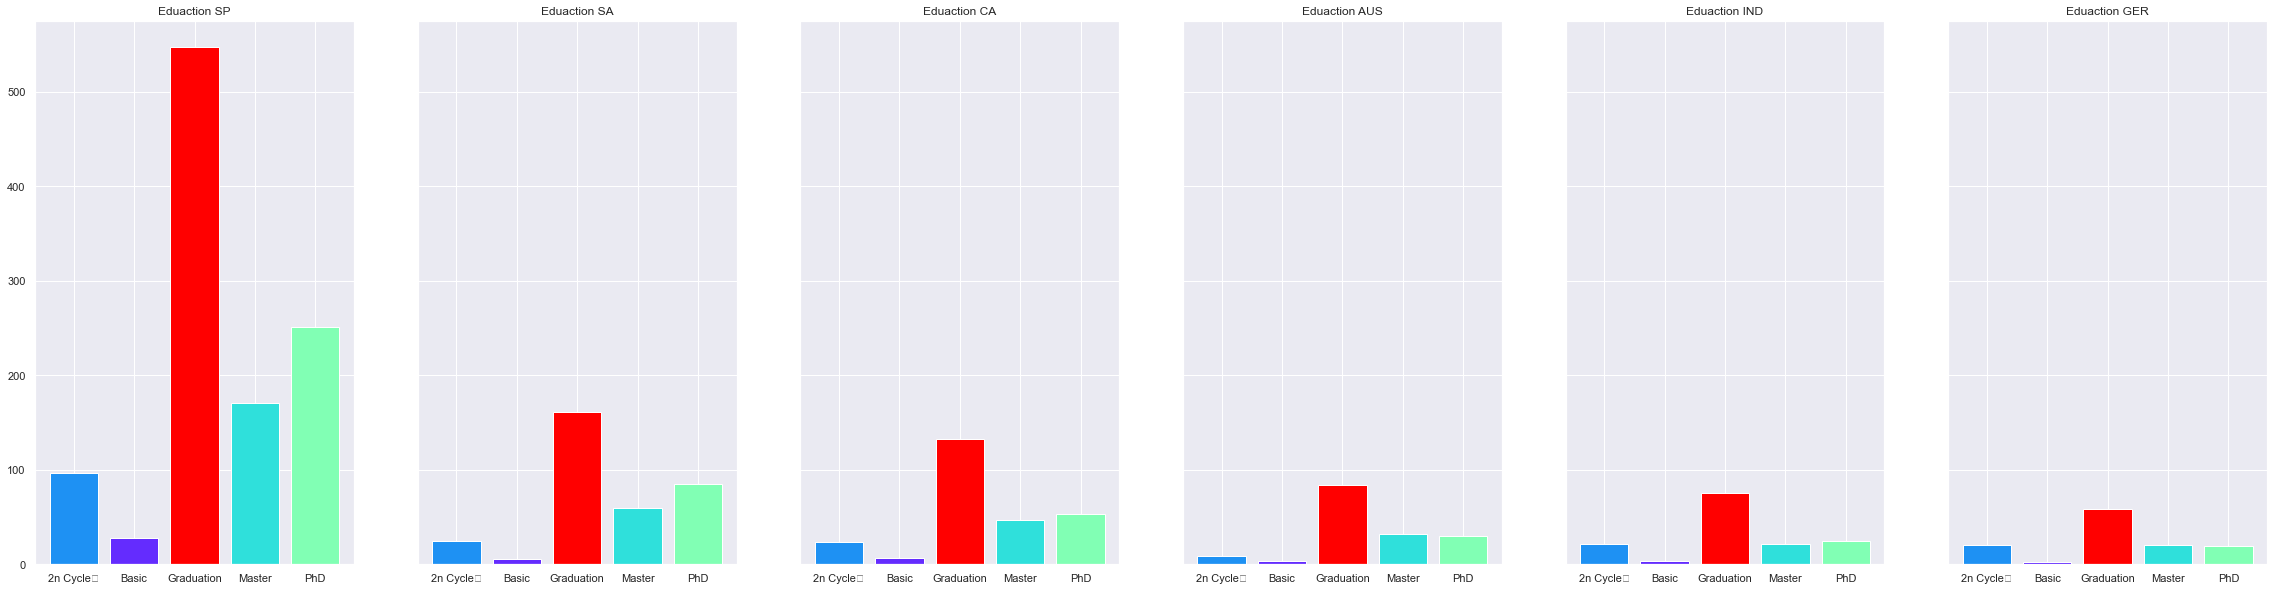

In [13]:
my_cmap = cm.get_cmap('rainbow')
my_norm = Normalize(vmin=0, vmax=500)
fig, (ax1, ax2,ax3, ax4,ax5, ax6) = plt.subplots(1, 6, figsize=(40,10), sharey=True)
ax1.bar(labels,np.array(tempSP['Marital_Status']),color=my_cmap(my_norm(np.array(tempSP['Marital_Status']))))
ax1.set_title('Eduaction SP')
ax2.bar(labels,np.array(tempSA['Marital_Status']),color=my_cmap(my_norm(np.array(tempSP['Marital_Status']))))
ax2.set_title('Eduaction SA')
ax3.bar(labels,np.array(tempCA['Marital_Status']),color=my_cmap(my_norm(np.array(tempSP['Marital_Status']))))
ax3.set_title('Eduaction CA')
ax4.bar(labels,np.array(tempAUS['Marital_Status']),color=my_cmap(my_norm(np.array(tempSP['Marital_Status']))))
ax4.set_title('Eduaction AUS')
ax5.bar(labels,np.array(tempIND['Marital_Status']),color=my_cmap(my_norm(np.array(tempSP['Marital_Status']))))
ax5.set_title('Eduaction IND')
ax6.bar(labels,np.array(tempGER['Marital_Status']),color=my_cmap(my_norm(np.array(tempSP['Marital_Status']))))
ax6.set_title('Eduaction GER')

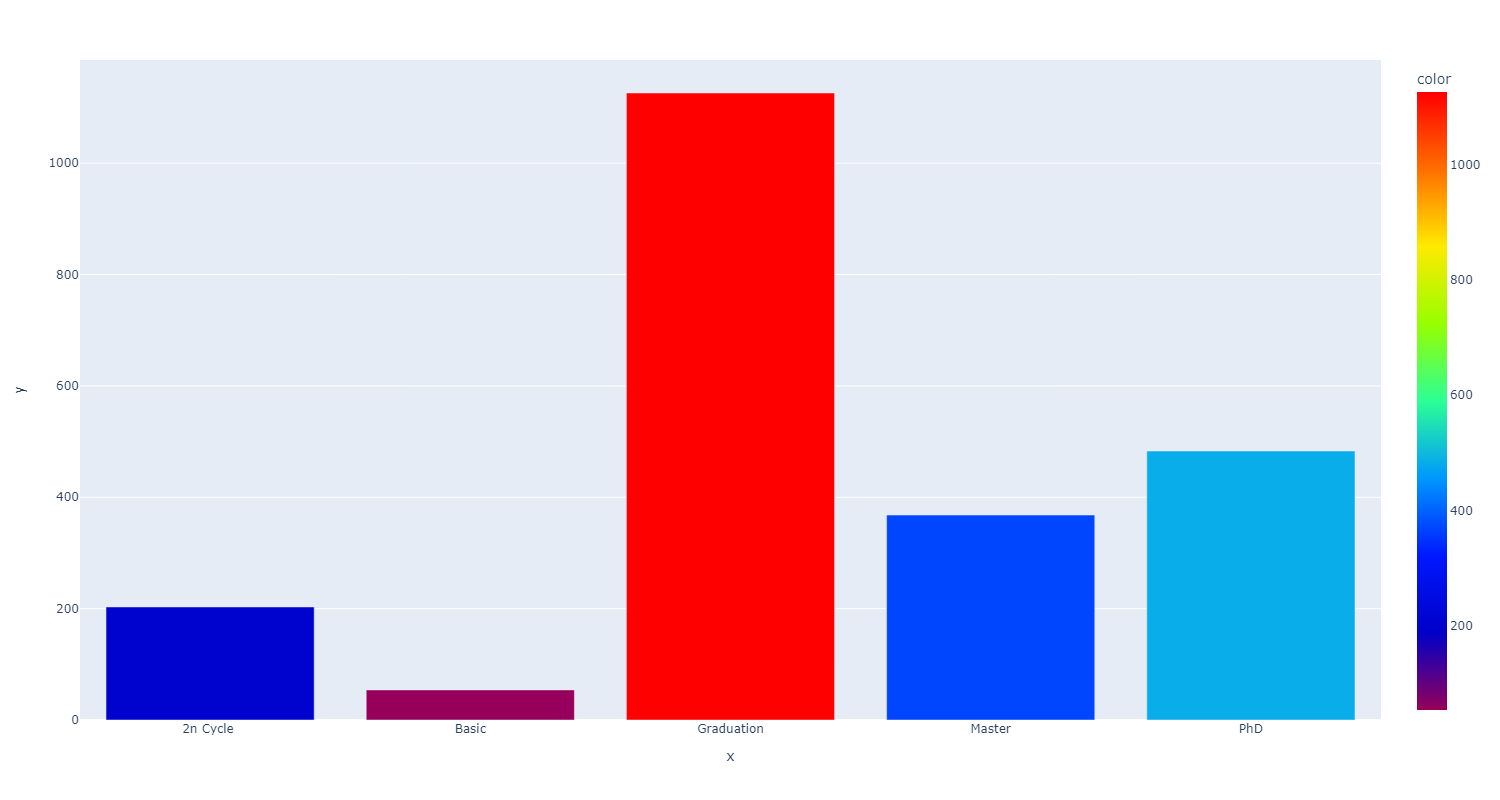

In [14]:
tempdf1=df1.groupby('Education').count()
fig=px.bar(x=labels,y=np.array(tempdf1['Marital_Status']),color=np.array(tempdf1['Marital_Status']), color_continuous_scale='Rainbow')
fig.write_image("EdAll.png", width=1500, height=800)
Image(filename='EdAll.png')

Majority of the customers have a Grad degree and when combined with Master and Phd it comprises mostly of our data.

In [16]:
df1.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1985,Graduation,Married,70951.0,0,0,05/04/2013,66,239,10,554,254,87,54,1,3,4,9,1,0,0,0,0,0,0,0,SA,36.0
1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,60.0
9,1975,Master,Single,46098.0,1,1,8/18/12,86,57,0,27,0,0,36,4,3,2,2,8,0,0,0,0,0,0,0,CA,46.0
13,1947,PhD,Widow,25358.0,0,1,7/22/13,57,19,0,5,0,0,8,2,1,0,3,6,0,0,0,0,0,0,0,SA,74.0
17,1971,PhD,Married,60491.0,0,1,09/06/2013,81,637,47,237,12,19,76,4,6,11,7,5,0,0,0,0,0,0,0,SP,50.0


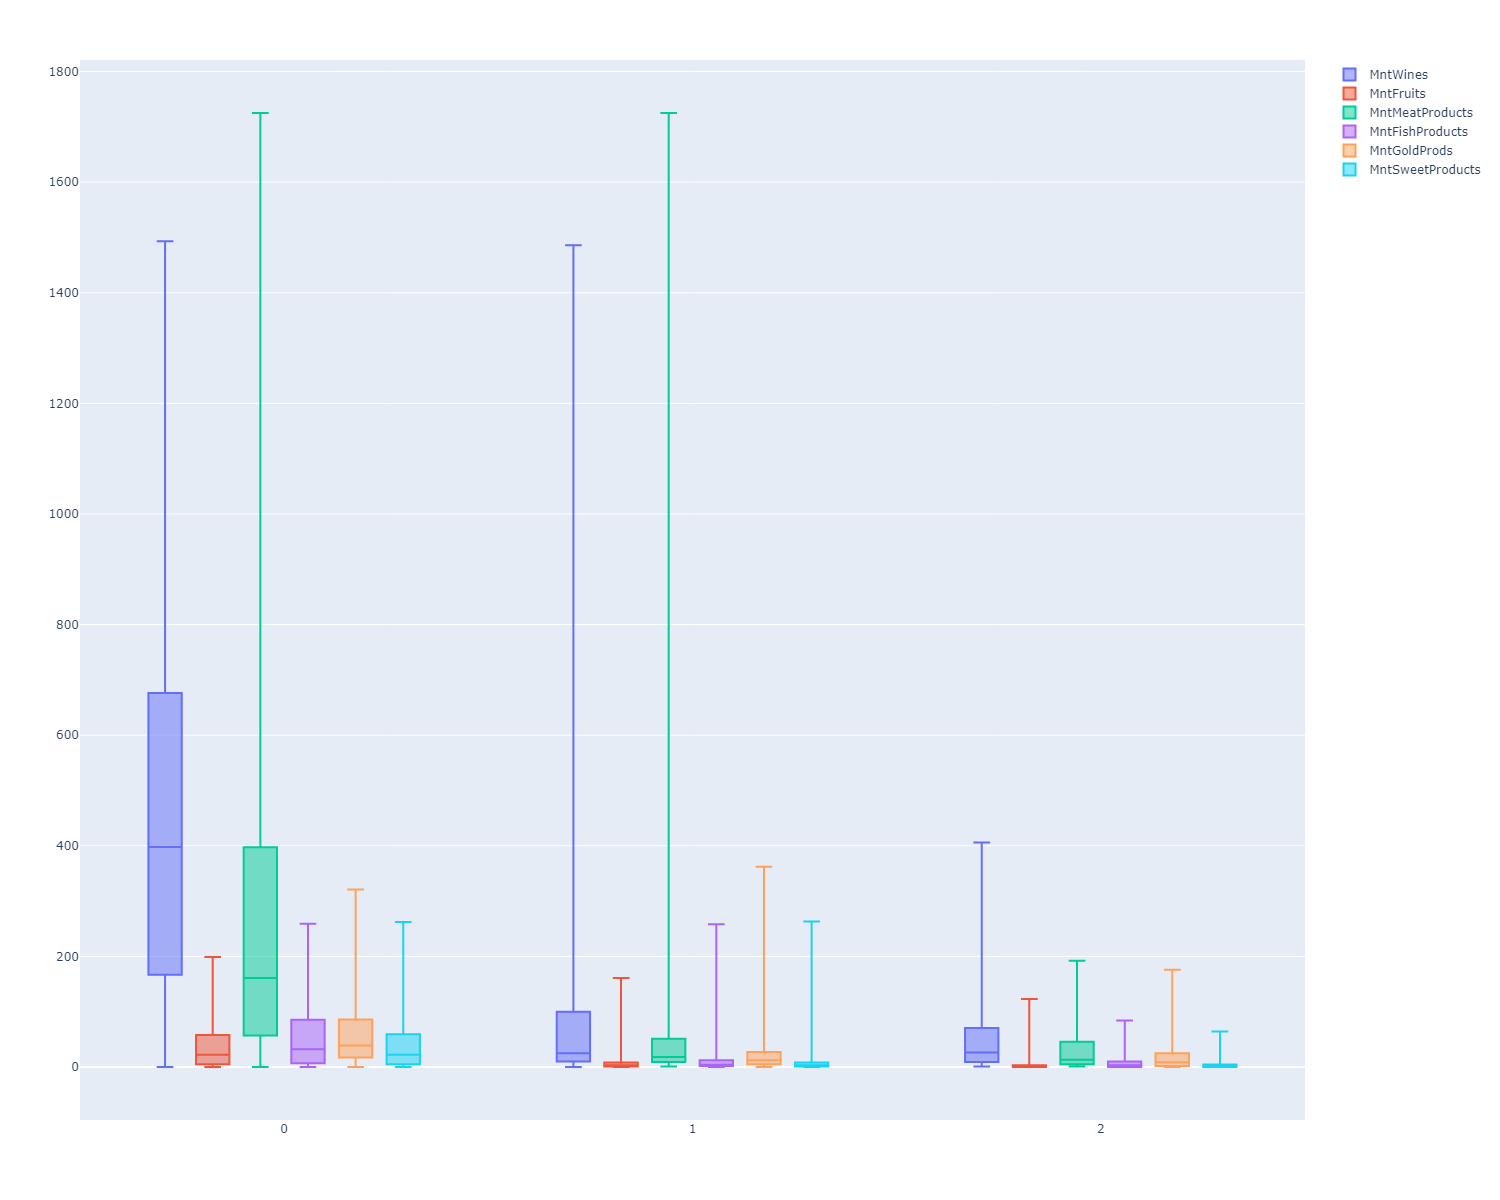

In [17]:
#fig=px.box(df1,x='Kidhome',y='MntSweetProducts',points=False)
fig=px.box()
fig.add_trace(go.Box(x=df1['Kidhome'], y=df1['MntWines'], name='MntWines',boxpoints=False))
fig.add_trace(go.Box(x=df1['Kidhome'], y=df1['MntFruits'], name='MntFruits',boxpoints=False))
fig.add_trace(go.Box(x=df1['Kidhome'], y=df1['MntMeatProducts'], name='MntMeatProducts',boxpoints=False))
fig.add_trace(go.Box(x=df1['Kidhome'], y=df1['MntFishProducts'], name='MntFishProducts',boxpoints=False))
fig.add_trace(go.Box(x=df1['Kidhome'], y=df1['MntGoldProds'], name='MntGoldProds',boxpoints=False))
fig.add_trace(go.Box(x=df1['Kidhome'], y=df1['MntSweetProducts'], name='MntSweetProducts',boxpoints=False))
fig.write_image("kid.png", width=1500, height=1200)
Image(filename='kid.png')

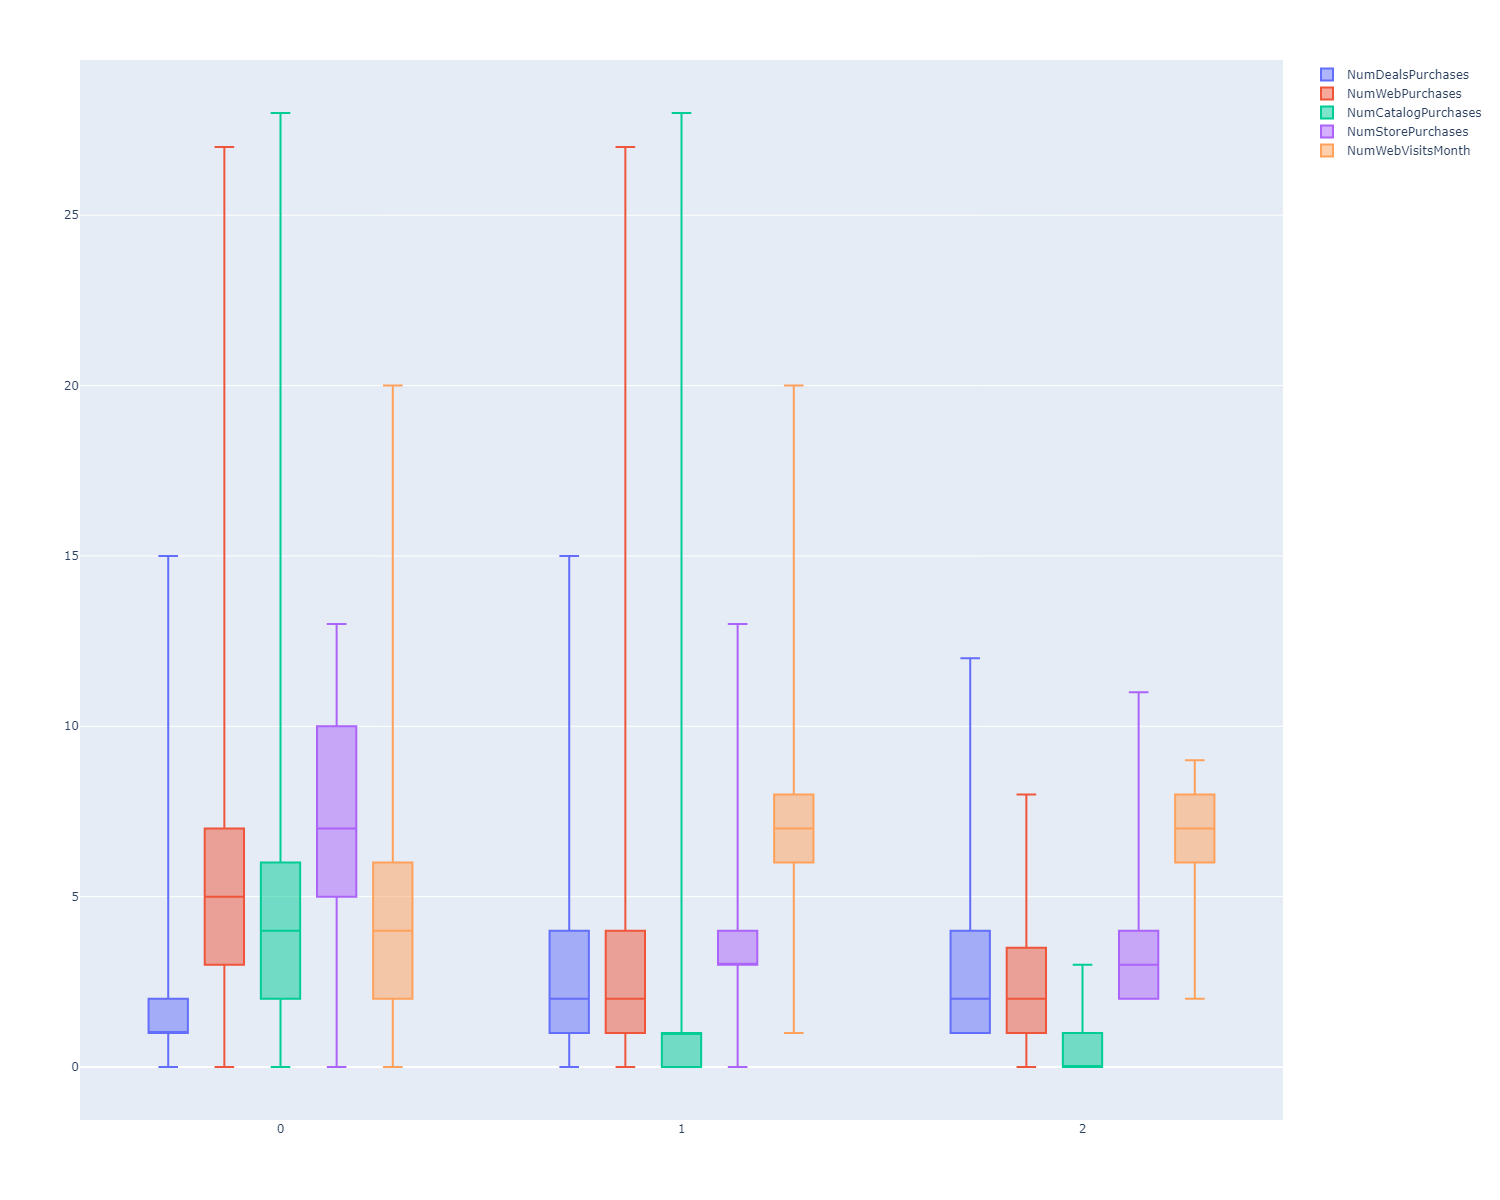

In [18]:
#fig=px.box(df1,x='Kidhome',y='MntSweetProducts',points=False)
fig=px.box()
fig.add_trace(go.Box(x=df1['Kidhome'], y=df1['NumDealsPurchases'], name='NumDealsPurchases',boxpoints=False))
fig.add_trace(go.Box(x=df1['Kidhome'], y=df1['NumWebPurchases'], name='NumWebPurchases',boxpoints=False))
fig.add_trace(go.Box(x=df1['Kidhome'], y=df1['NumCatalogPurchases'], name='NumCatalogPurchases',boxpoints=False))
fig.add_trace(go.Box(x=df1['Kidhome'], y=df1['NumStorePurchases'], name='NumStorePurchases',boxpoints=False))
fig.add_trace(go.Box(x=df1['Kidhome'], y=df1['NumWebVisitsMonth'], name='NumWebVisitsMonth',boxpoints=False))
fig.write_image("kid2.png", width=1500, height=1200)
Image(filename='kid2.png')

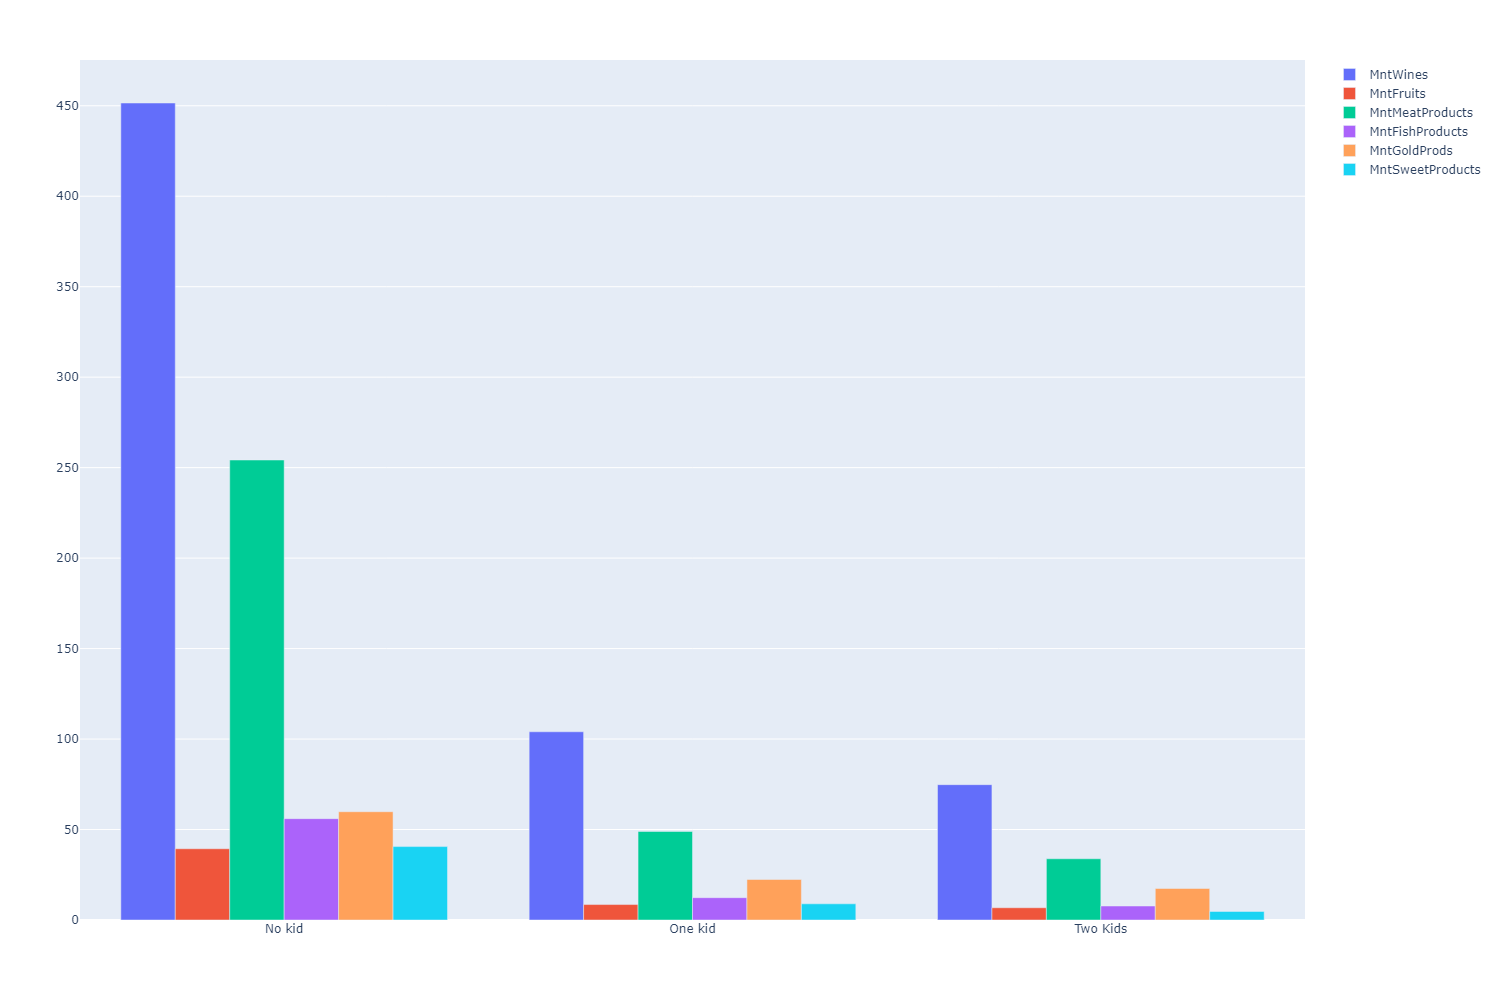

In [19]:
tempdf2=df1.groupby('Kidhome').mean()
fig=px.box()
labels = ['No kid','One kid','Two Kids']
fig.add_trace(go.Bar(x=labels, y=tempdf2['MntWines'], name='MntWines'))
fig.add_trace(go.Bar(x=labels, y=tempdf2['MntFruits'], name='MntFruits'))
fig.add_trace(go.Bar(x=labels, y=tempdf2['MntMeatProducts'], name='MntMeatProducts'))
fig.add_trace(go.Bar(x=labels, y=tempdf2['MntFishProducts'], name='MntFishProducts'))
fig.add_trace(go.Bar(x=labels, y=tempdf2['MntGoldProds'], name='MntGoldProds'))
fig.add_trace(go.Bar(x=labels, y=tempdf2['MntSweetProducts'], name='MntSweetProducts'))
fig.write_image("kidmean.png", width=1500, height=1000)
Image(filename='kidmean.png')

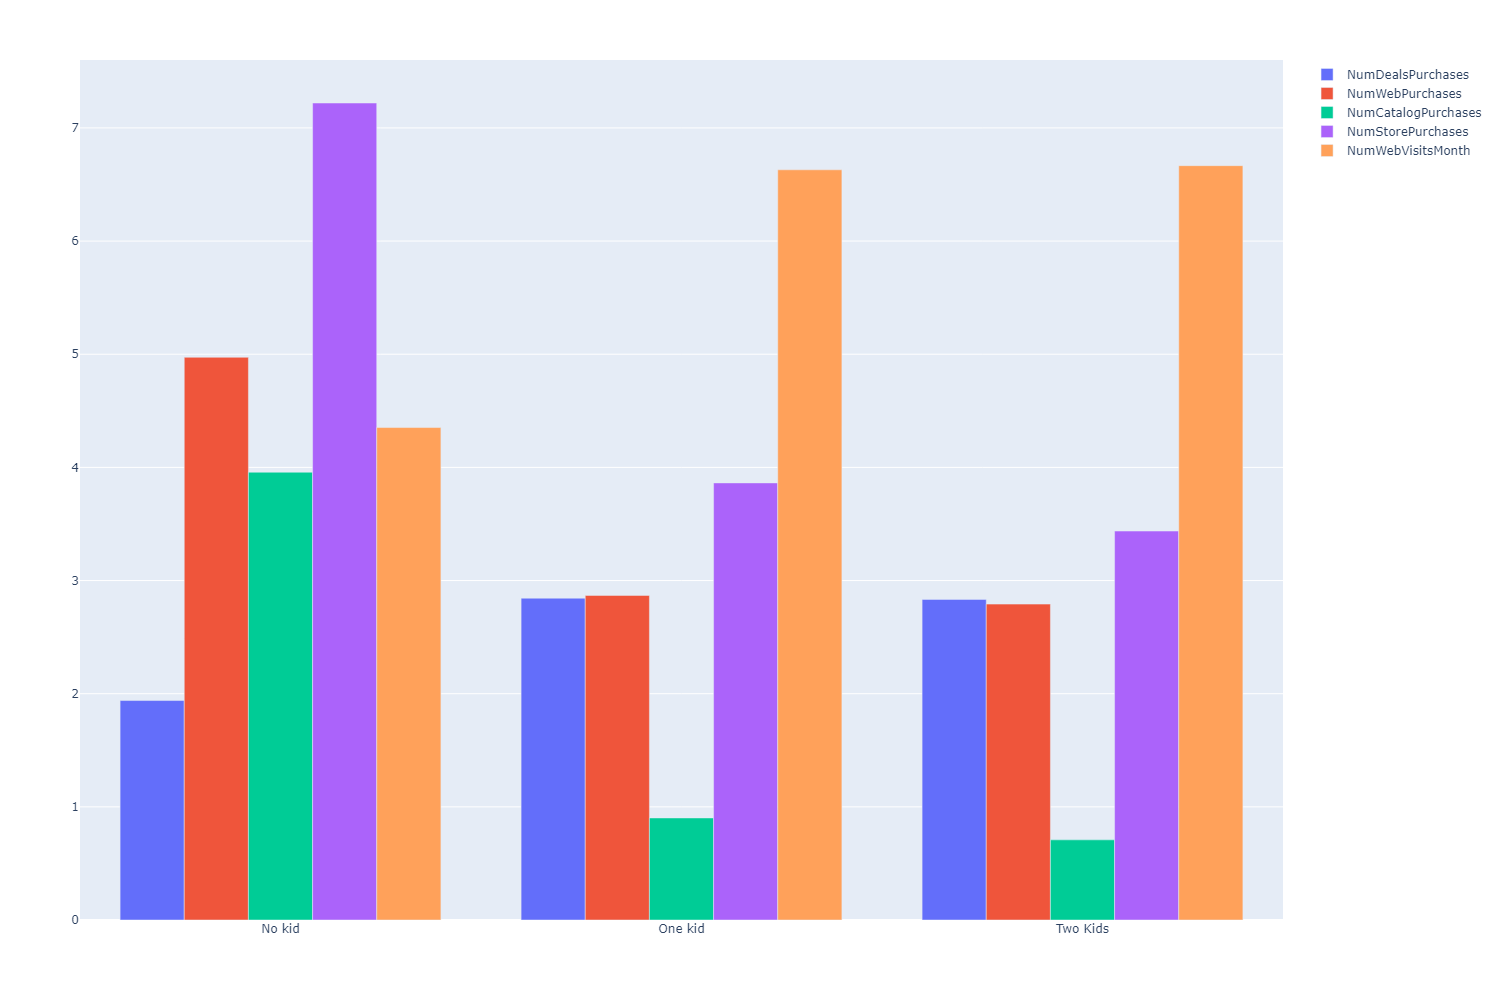

In [20]:
tempdf2=df1.groupby('Kidhome').mean()
fig=px.box()
labels = ['No kid','One kid','Two Kids']
fig.add_trace(go.Bar(x=labels, y=tempdf2['NumDealsPurchases'], name='NumDealsPurchases'))
fig.add_trace(go.Bar(x=labels, y=tempdf2['NumWebPurchases'], name='NumWebPurchases'))
fig.add_trace(go.Bar(x=labels, y=tempdf2['NumCatalogPurchases'], name='NumCatalogPurchases'))
fig.add_trace(go.Bar(x=labels, y=tempdf2['NumStorePurchases'], name='NumStorePurchases'))
fig.add_trace(go.Bar(x=labels, y=tempdf2['NumWebVisitsMonth'], name='NumWebVisitsMonth'))
fig.write_image("kidmean1.png", width=1500, height=1000)
Image(filename='kidmean1.png')

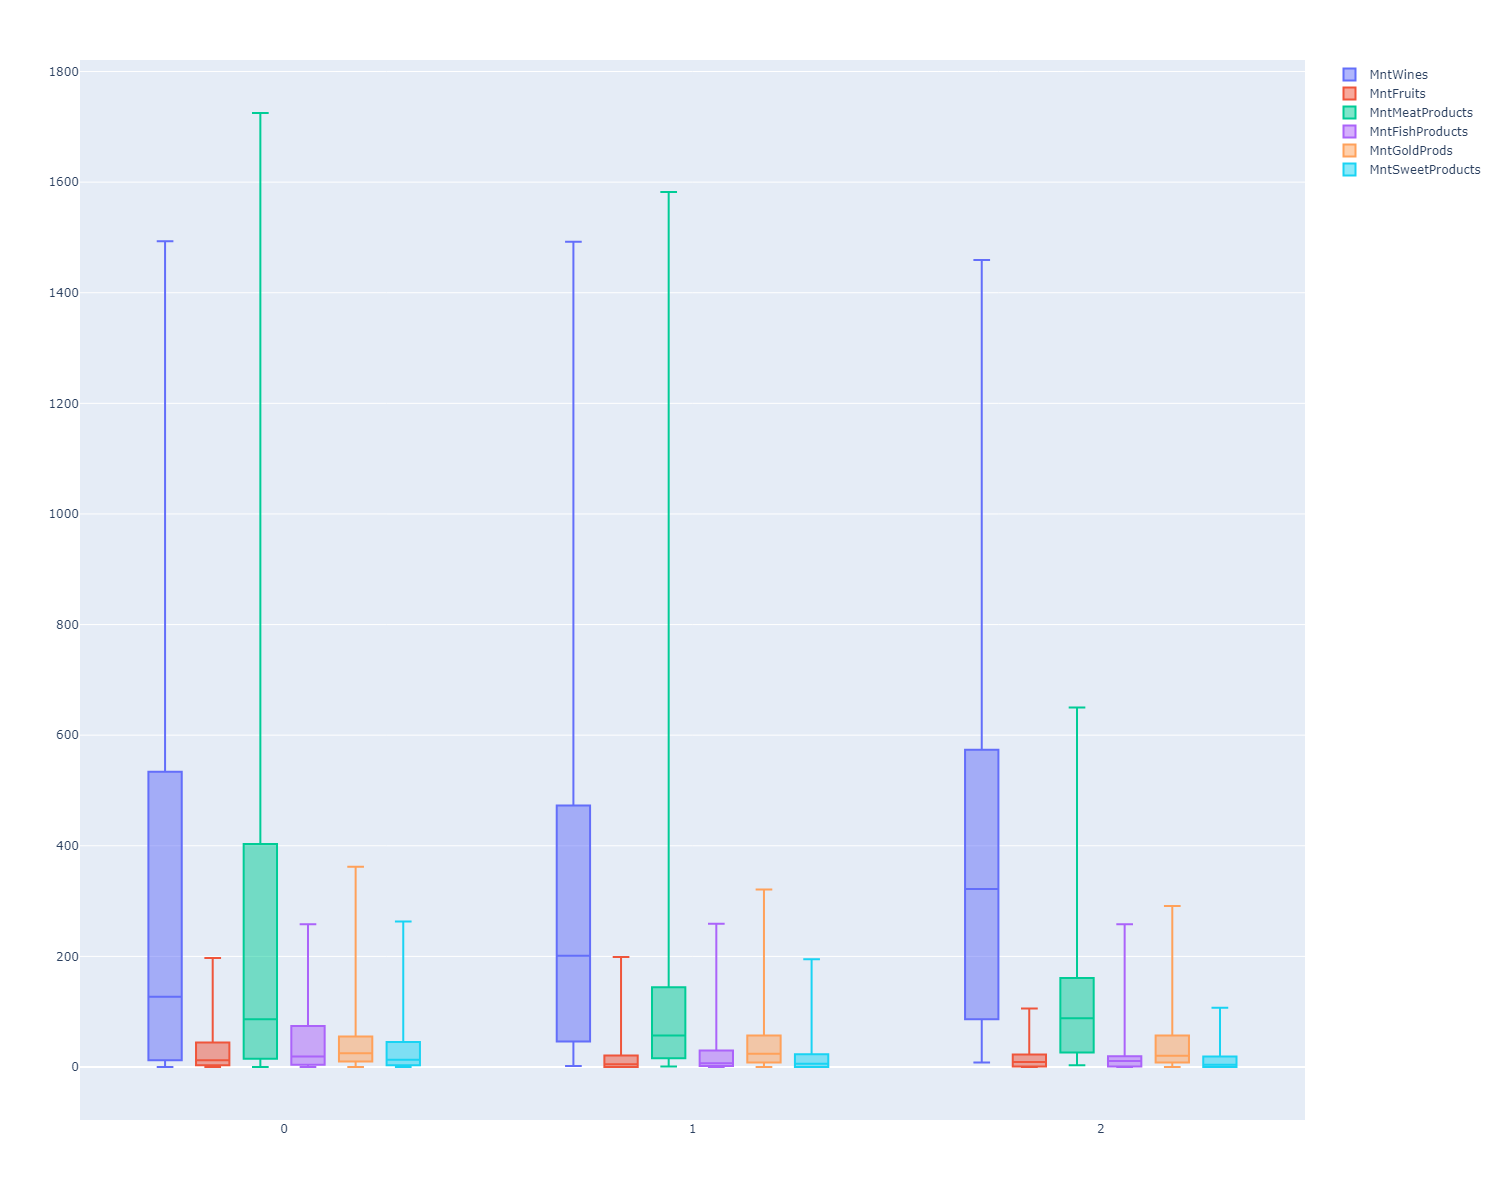

In [21]:
#fig=px.box(df1,x='Kidhome',y='MntSweetProducts',points=False)
fig=px.box()
fig.add_trace(go.Box(x=df1['Teenhome'], y=df1['MntWines'], name='MntWines',boxpoints=False))
fig.add_trace(go.Box(x=df1['Teenhome'], y=df1['MntFruits'], name='MntFruits',boxpoints=False))
fig.add_trace(go.Box(x=df1['Teenhome'], y=df1['MntMeatProducts'], name='MntMeatProducts',boxpoints=False))
fig.add_trace(go.Box(x=df1['Teenhome'], y=df1['MntFishProducts'], name='MntFishProducts',boxpoints=False))
fig.add_trace(go.Box(x=df1['Teenhome'], y=df1['MntGoldProds'], name='MntGoldProds',boxpoints=False))
fig.add_trace(go.Box(x=df1['Teenhome'], y=df1['MntSweetProducts'], name='MntSweetProducts',boxpoints=False))
fig.write_image("teen.png", width=1500, height=1200)
Image(filename='teen.png')

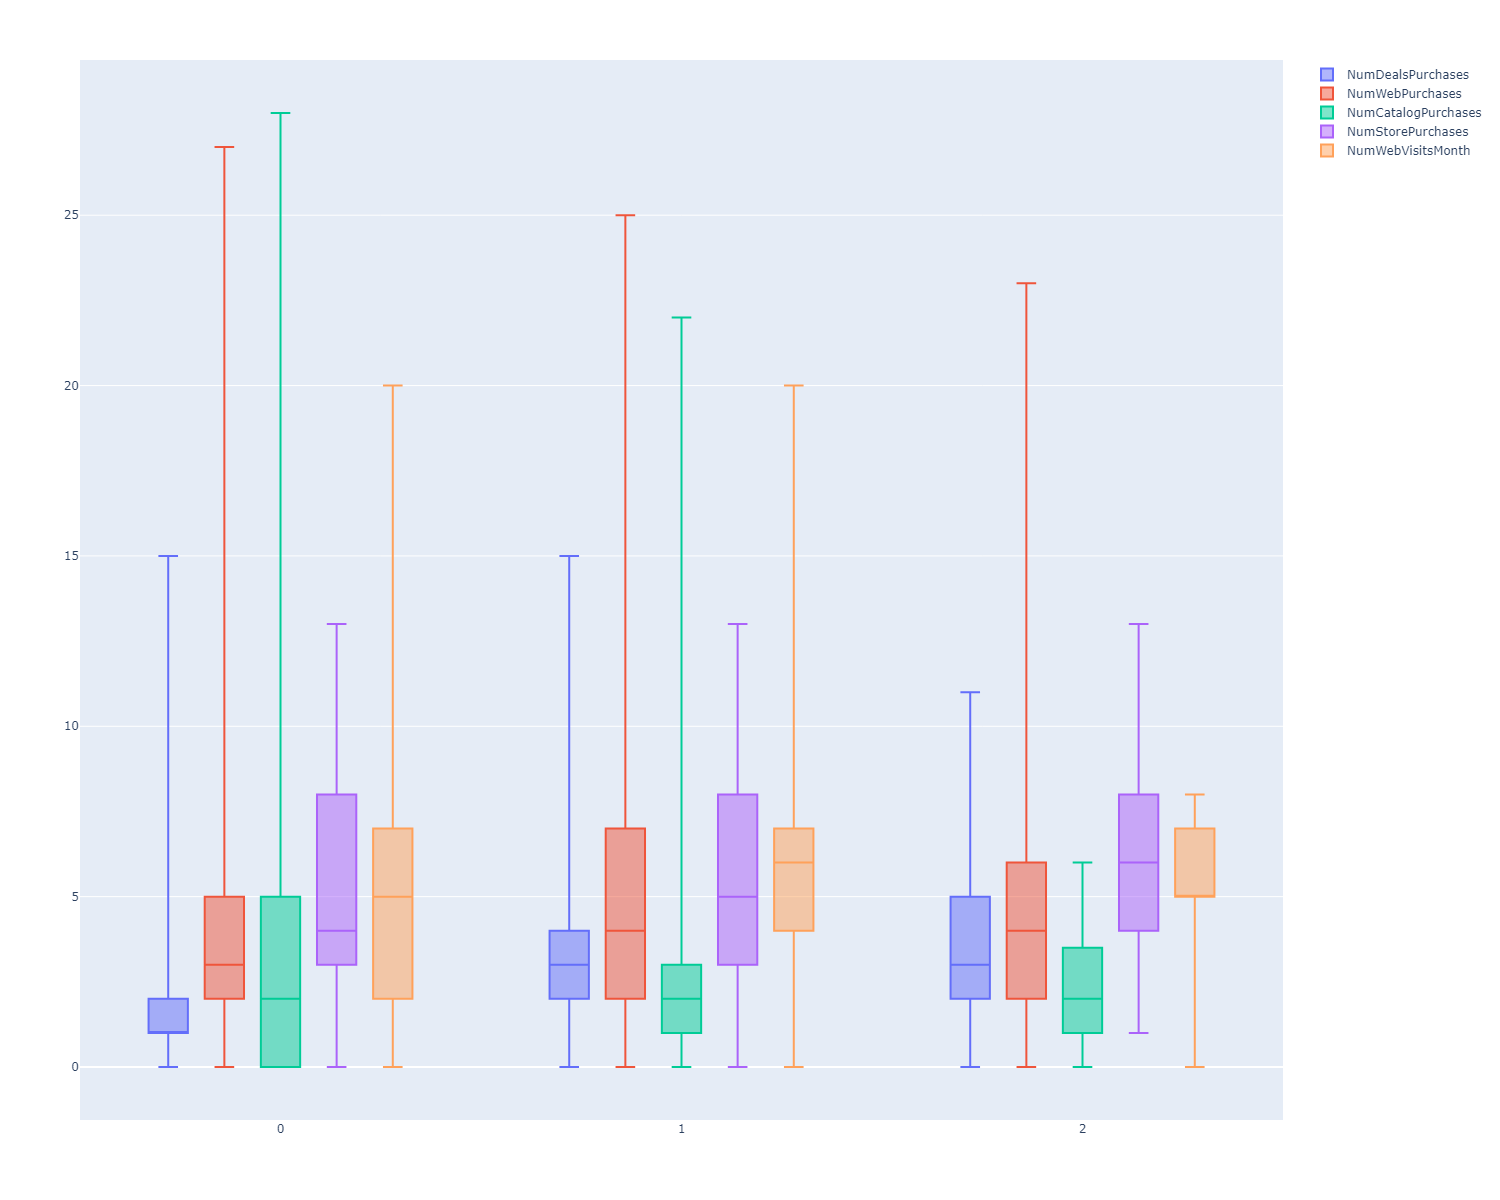

In [22]:
#fig=px.box(df1,x='Kidhome',y='MntSweetProducts',points=False)
fig=px.box()
fig.add_trace(go.Box(x=df1['Teenhome'], y=df1['NumDealsPurchases'], name='NumDealsPurchases',boxpoints=False))
fig.add_trace(go.Box(x=df1['Teenhome'], y=df1['NumWebPurchases'], name='NumWebPurchases',boxpoints=False))
fig.add_trace(go.Box(x=df1['Teenhome'], y=df1['NumCatalogPurchases'], name='NumCatalogPurchases',boxpoints=False))
fig.add_trace(go.Box(x=df1['Teenhome'], y=df1['NumStorePurchases'], name='NumStorePurchases',boxpoints=False))
fig.add_trace(go.Box(x=df1['Teenhome'], y=df1['NumWebVisitsMonth'], name='NumWebVisitsMonth',boxpoints=False))
fig.write_image("teen2.png", width=1500, height=1200)
Image(filename='teen2.png')

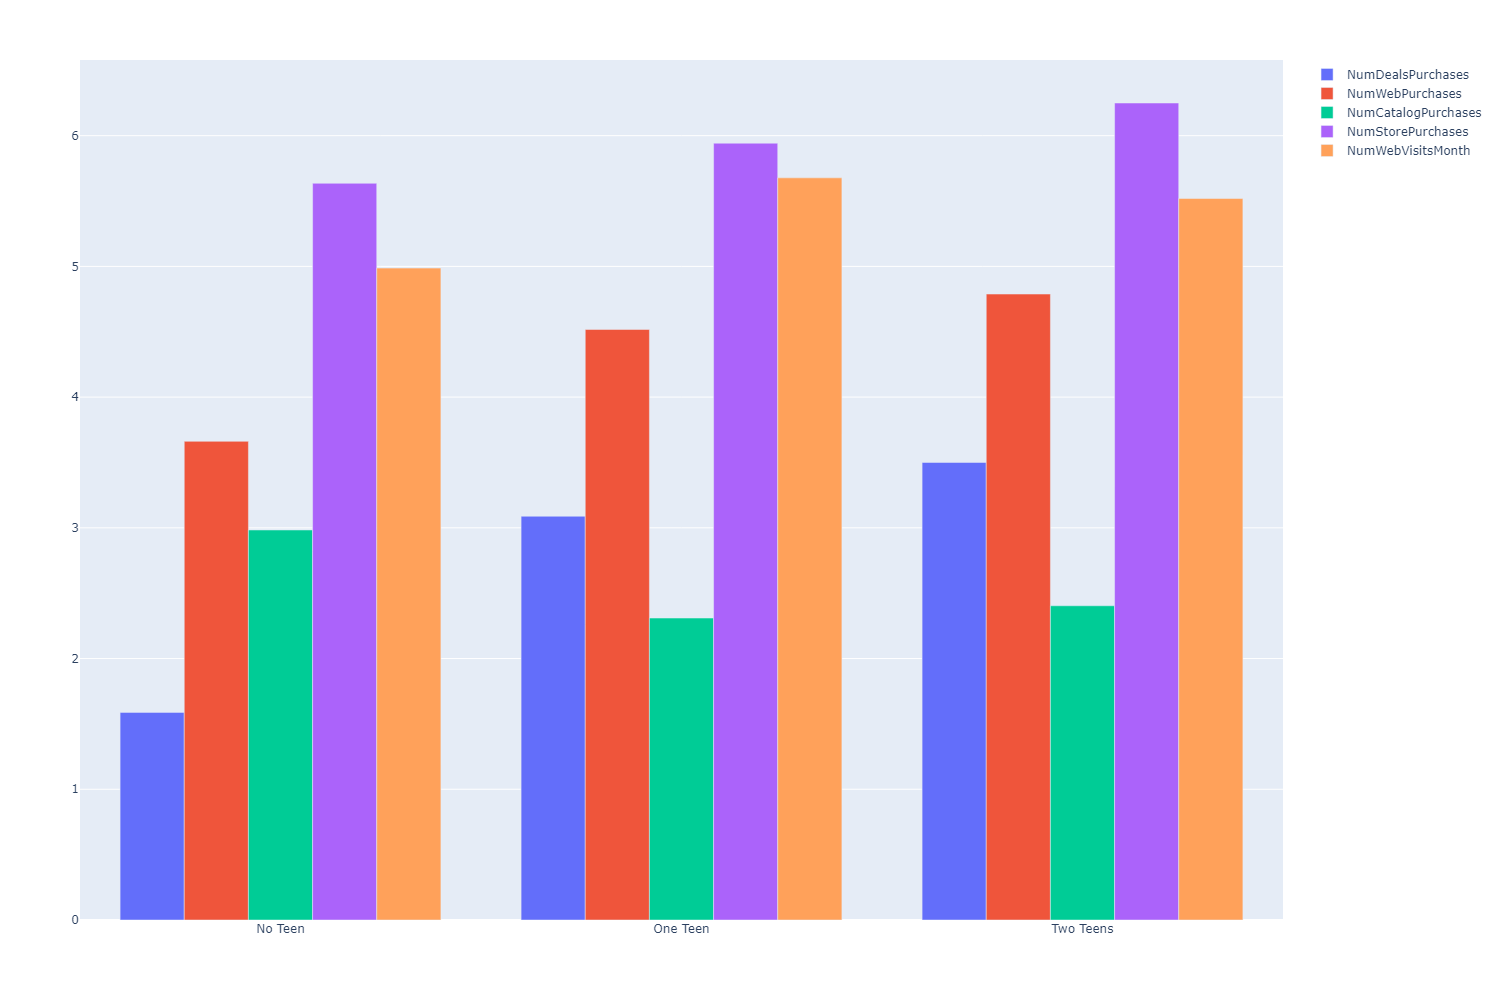

In [23]:
tempdf2=df1.groupby('Teenhome').mean()
fig=px.box()
labels = ['No Teen','One Teen','Two Teens']
fig.add_trace(go.Bar(x=labels, y=tempdf2['NumDealsPurchases'], name='NumDealsPurchases'))
fig.add_trace(go.Bar(x=labels, y=tempdf2['NumWebPurchases'], name='NumWebPurchases'))
fig.add_trace(go.Bar(x=labels, y=tempdf2['NumCatalogPurchases'], name='NumCatalogPurchases'))
fig.add_trace(go.Bar(x=labels, y=tempdf2['NumStorePurchases'], name='NumStorePurchases'))
fig.add_trace(go.Bar(x=labels, y=tempdf2['NumWebVisitsMonth'], name='NumWebVisitsMonth'))
fig.write_image("Teenmean1.png", width=1500, height=1000)
Image(filename='Teenmean1.png')

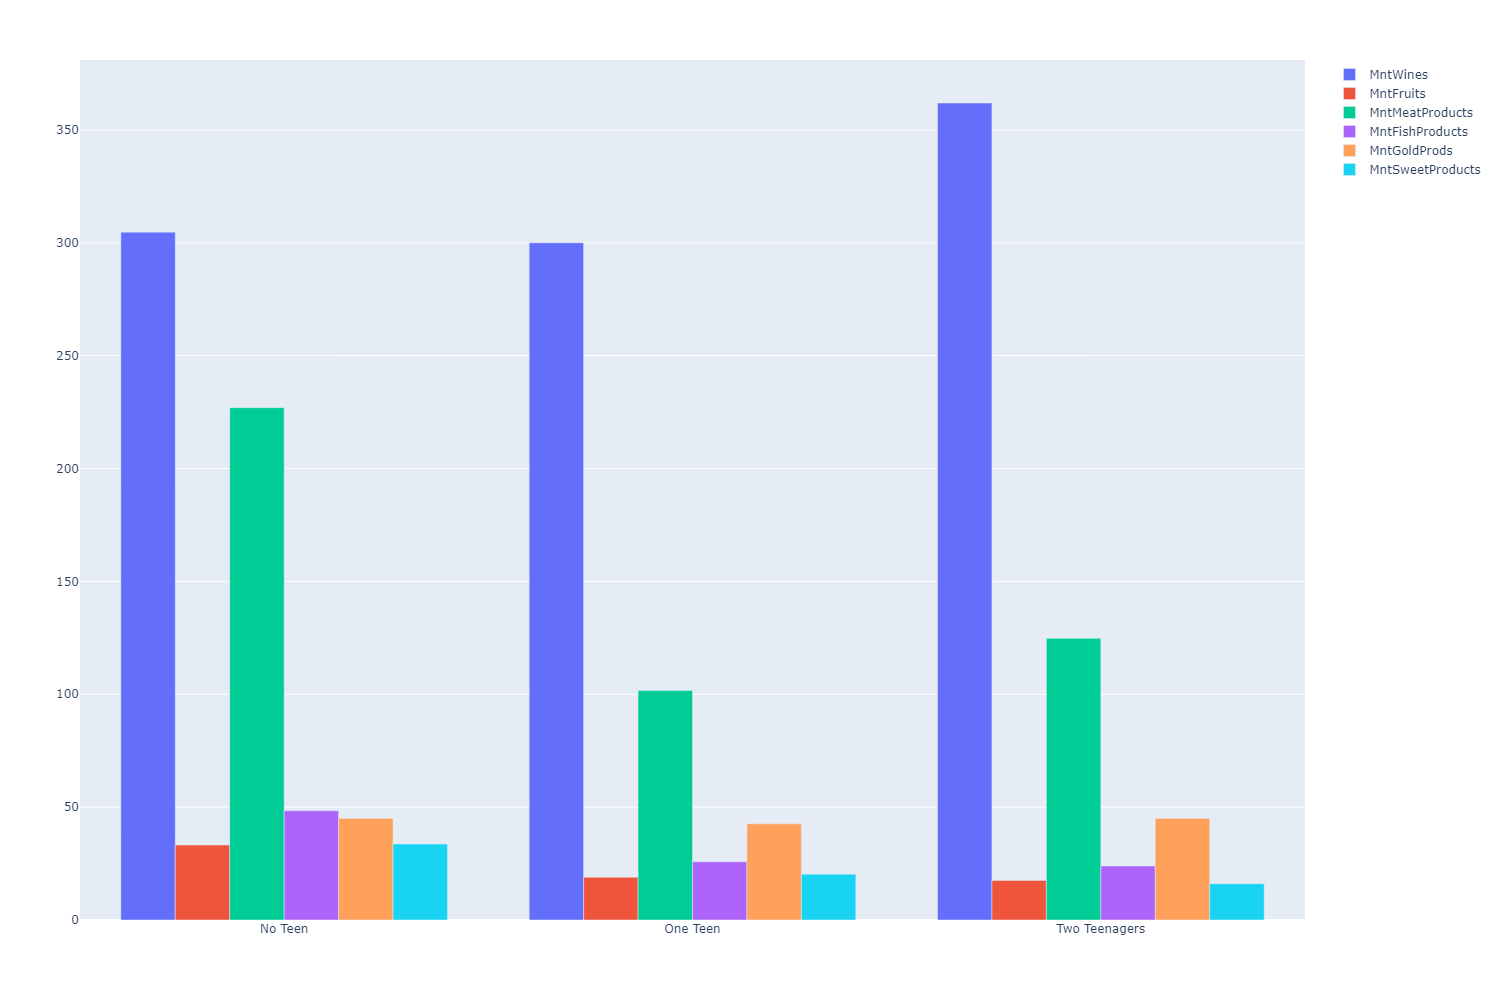

In [24]:
tempdf2=df1.groupby('Teenhome').mean()
fig=px.box()
labels = ['No Teen','One Teen','Two Teenagers']
fig.add_trace(go.Bar(x=labels, y=tempdf2['MntWines'], name='MntWines'))
fig.add_trace(go.Bar(x=labels, y=tempdf2['MntFruits'], name='MntFruits'))
fig.add_trace(go.Bar(x=labels, y=tempdf2['MntMeatProducts'], name='MntMeatProducts'))
fig.add_trace(go.Bar(x=labels, y=tempdf2['MntFishProducts'], name='MntFishProducts'))
fig.add_trace(go.Bar(x=labels, y=tempdf2['MntGoldProds'], name='MntGoldProds'))
fig.add_trace(go.Bar(x=labels, y=tempdf2['MntSweetProducts'], name='MntSweetProducts'))
fig.write_image("teenmean.png", width=1500, height=1000)
Image(filename='teenmean.png')

<ipython-input-25-7c4ef2c5ac77>:21: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.

<ipython-input-25-7c4ef2c5ac77>:42: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.

<ipython-input-25-7c4ef2c5ac77>:63: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.

<ipython-input-25-7c4ef2c5ac77>:85: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.

<ipython-input-25-7c4ef2c5ac77>:106: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



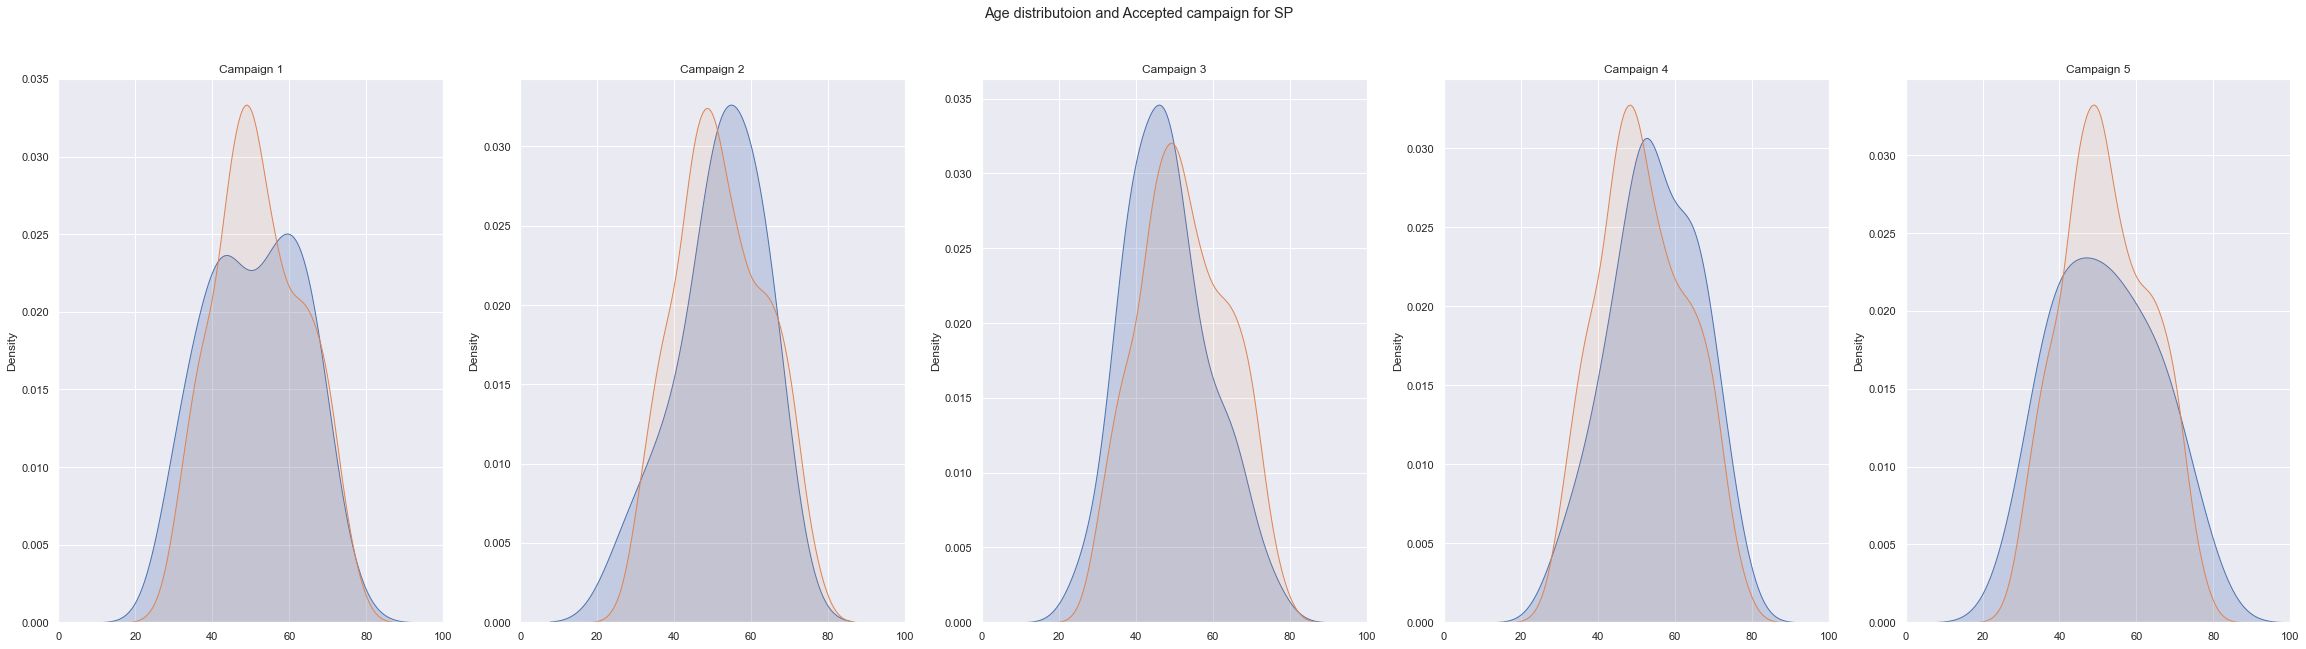

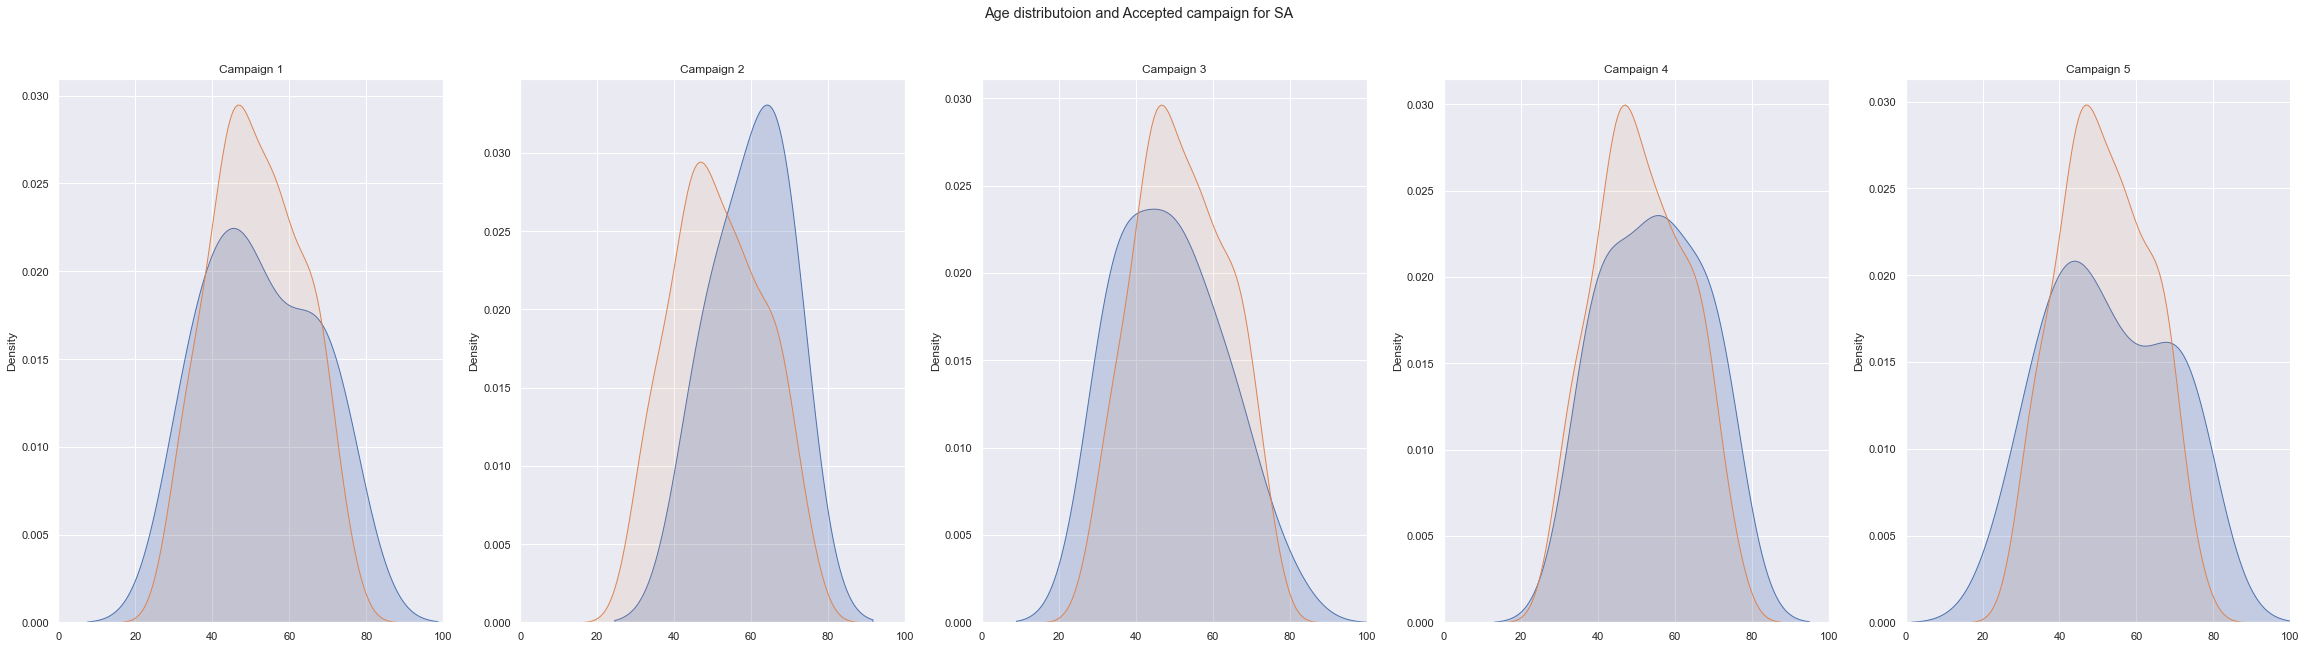

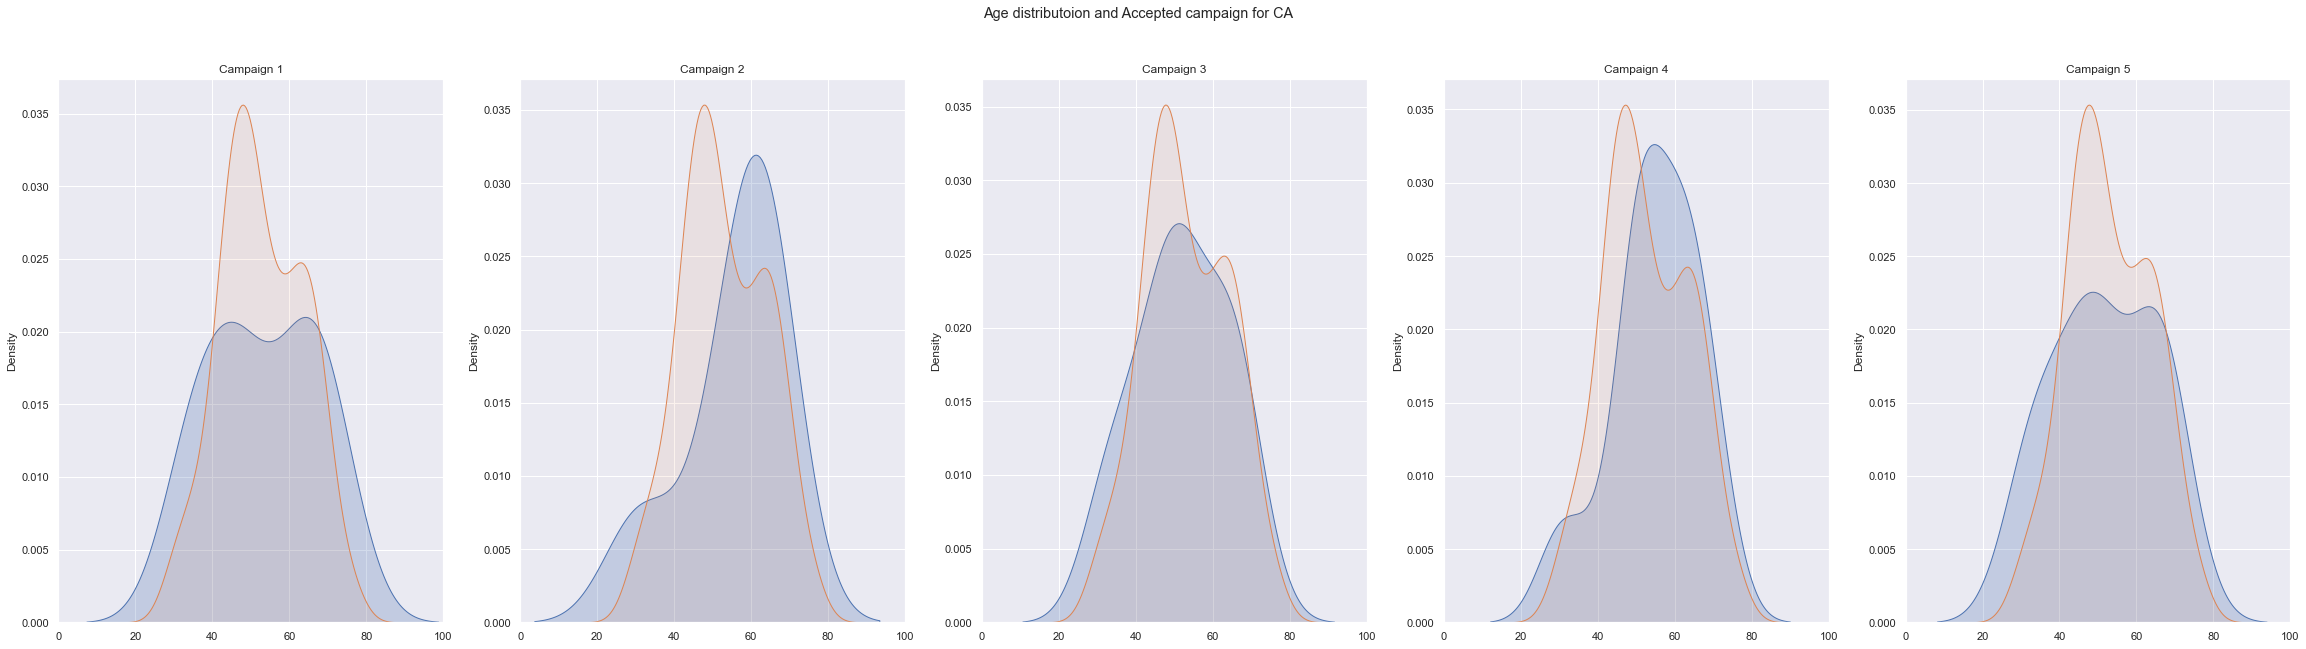

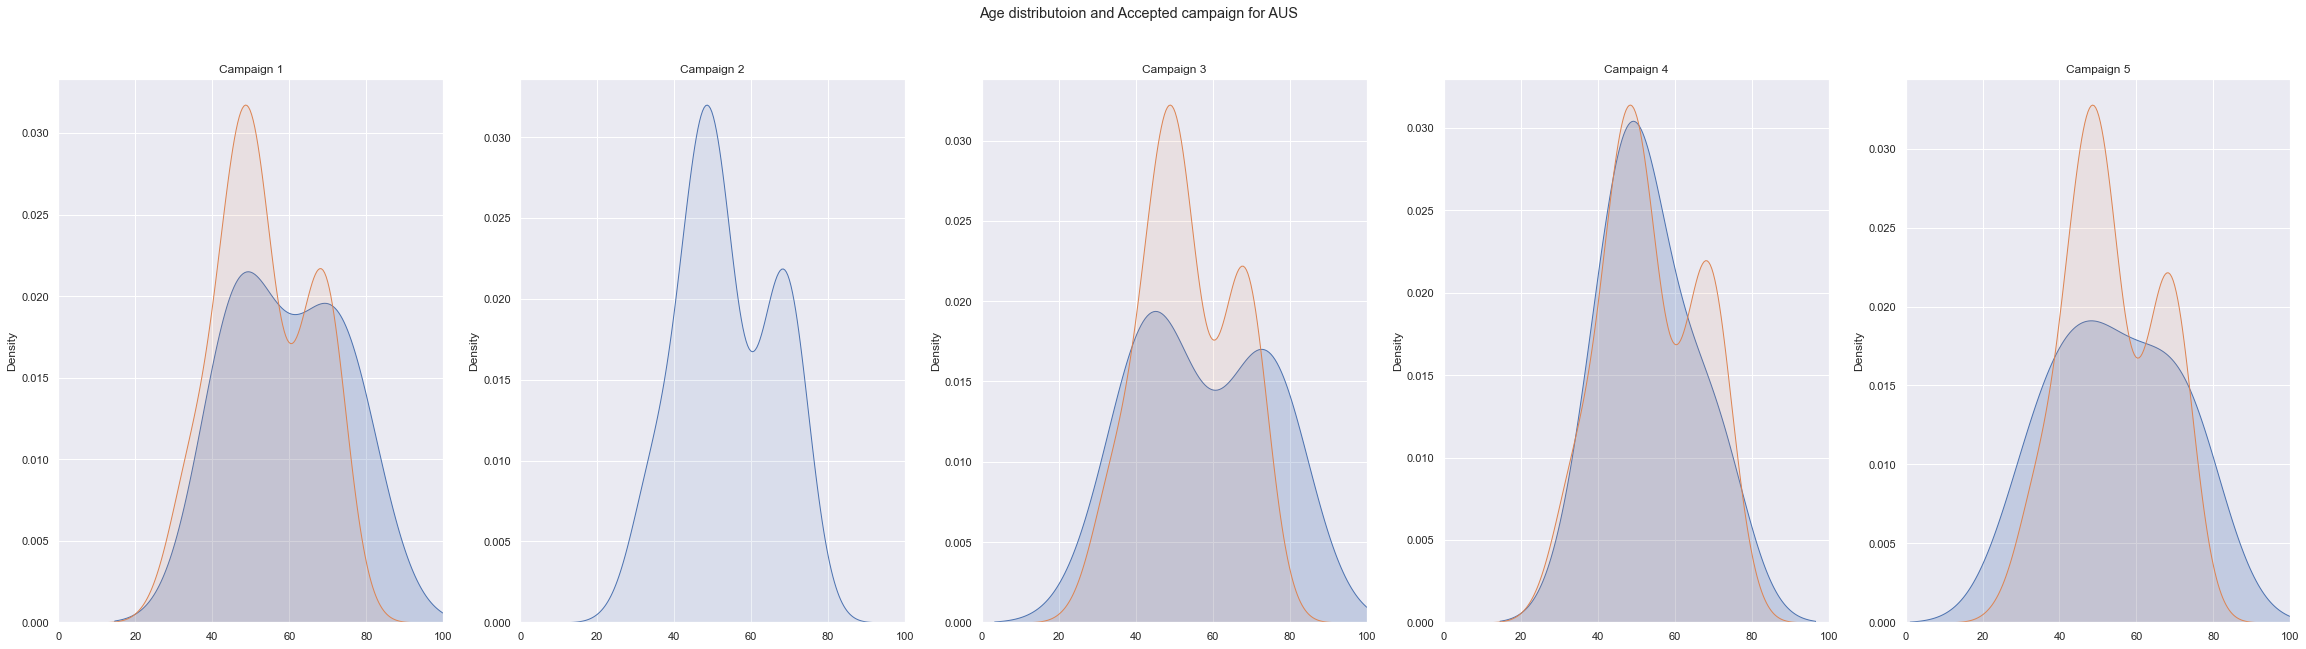

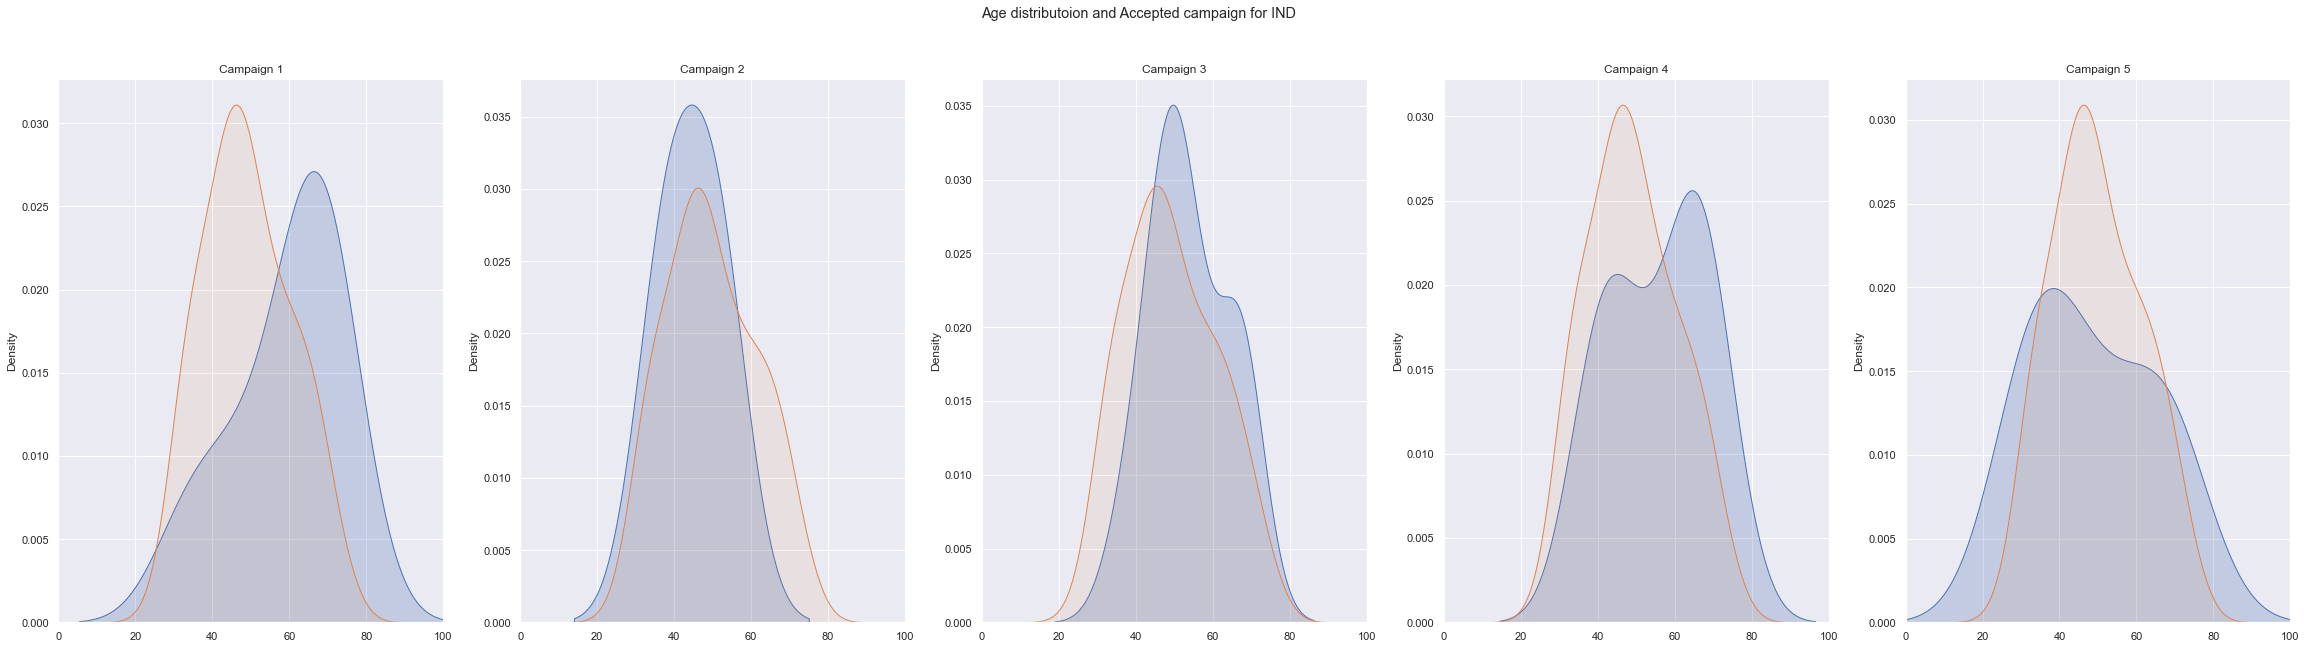

In [25]:
dfSP=df1.loc[df1['Country']=='SP']
fig,axes=plt.subplots(1,5,figsize=(40,10))
fig.suptitle('Age distributoion and Accepted campaign for SP')
sns.kdeplot(np.array(dfSP['Age'].loc[df['AcceptedCmp1']==1]),ax=axes[0],fill=True)
sns.kdeplot(np.array(dfSP['Age'].loc[df['AcceptedCmp1']==0]),ax=axes[0],fill=True,alpha=0.1)
axes[0].set_title('Campaign 1')
sns.kdeplot(np.array(dfSP['Age'].loc[df['AcceptedCmp2']==1]),ax=axes[1],fill=True)
sns.kdeplot(np.array(dfSP['Age'].loc[df['AcceptedCmp2']==0]),ax=axes[1],fill=True,alpha=0.1)
axes[1].set_title('Campaign 2')
sns.kdeplot(np.array(dfSP['Age'].loc[df['AcceptedCmp3']==1]),ax=axes[2],fill=True)
sns.kdeplot(np.array(dfSP['Age'].loc[df['AcceptedCmp3']==0]),ax=axes[2],fill=True,alpha=0.1)
axes[2].set_title('Campaign 3')
sns.kdeplot(np.array(dfSP['Age'].loc[df['AcceptedCmp4']==1]),ax=axes[3],fill=True)
sns.kdeplot(np.array(dfSP['Age'].loc[df['AcceptedCmp4']==0]),ax=axes[3],fill=True,alpha=0.1)
axes[3].set_title('Campaign 4')
sns.kdeplot(np.array(dfSP['Age'].loc[df['AcceptedCmp5']==1]),ax=axes[4],fill=True)
sns.kdeplot(np.array(dfSP['Age'].loc[df['AcceptedCmp5']==0]),ax=axes[4],fill=True,alpha=0.1)
axes[4].set_title('Campaign 5')
for ax in fig.axes:
    ax.set_xlim(0,100) 
fig.show()
dfSP=df1.loc[df1['Country']=='SA']
fig,axes=plt.subplots(1,5,figsize=(40,10))
fig.suptitle('Age distributoion and Accepted campaign for SA')
sns.kdeplot(np.array(dfSP['Age'].loc[df['AcceptedCmp1']==1]),ax=axes[0],fill=True)
sns.kdeplot(np.array(dfSP['Age'].loc[df['AcceptedCmp1']==0]),ax=axes[0],fill=True,alpha=0.1)
axes[0].set_title('Campaign 1')
sns.kdeplot(np.array(dfSP['Age'].loc[df['AcceptedCmp2']==1]),ax=axes[1],fill=True)
sns.kdeplot(np.array(dfSP['Age'].loc[df['AcceptedCmp2']==0]),ax=axes[1],fill=True,alpha=0.1)
axes[1].set_title('Campaign 2')
sns.kdeplot(np.array(dfSP['Age'].loc[df['AcceptedCmp3']==1]),ax=axes[2],fill=True)
sns.kdeplot(np.array(dfSP['Age'].loc[df['AcceptedCmp3']==0]),ax=axes[2],fill=True,alpha=0.1)
axes[2].set_title('Campaign 3')
sns.kdeplot(np.array(dfSP['Age'].loc[df['AcceptedCmp4']==1]),ax=axes[3],fill=True)
sns.kdeplot(np.array(dfSP['Age'].loc[df['AcceptedCmp4']==0]),ax=axes[3],fill=True,alpha=0.1)
axes[3].set_title('Campaign 4')
sns.kdeplot(np.array(dfSP['Age'].loc[df['AcceptedCmp5']==1]),ax=axes[4],fill=True)
sns.kdeplot(np.array(dfSP['Age'].loc[df['AcceptedCmp5']==0]),ax=axes[4],fill=True,alpha=0.1)
axes[4].set_title('Campaign 5')
for ax in fig.axes:
    ax.set_xlim(0,100) 
fig.show()
dfSP=df1.loc[df1['Country']=='CA']
fig,axes=plt.subplots(1,5,figsize=(40,10))
fig.suptitle('Age distributoion and Accepted campaign for CA')
sns.kdeplot(np.array(dfSP['Age'].loc[df['AcceptedCmp1']==1]),ax=axes[0],fill=True)
sns.kdeplot(np.array(dfSP['Age'].loc[df['AcceptedCmp1']==0]),ax=axes[0],fill=True,alpha=0.1)
axes[0].set_title('Campaign 1')
sns.kdeplot(np.array(dfSP['Age'].loc[df['AcceptedCmp2']==1]),ax=axes[1],fill=True)
sns.kdeplot(np.array(dfSP['Age'].loc[df['AcceptedCmp2']==0]),ax=axes[1],fill=True,alpha=0.1)
axes[1].set_title('Campaign 2')
sns.kdeplot(np.array(dfSP['Age'].loc[df['AcceptedCmp3']==1]),ax=axes[2],fill=True)
sns.kdeplot(np.array(dfSP['Age'].loc[df['AcceptedCmp3']==0]),ax=axes[2],fill=True,alpha=0.1)
axes[2].set_title('Campaign 3')
sns.kdeplot(np.array(dfSP['Age'].loc[df['AcceptedCmp4']==1]),ax=axes[3],fill=True)
sns.kdeplot(np.array(dfSP['Age'].loc[df['AcceptedCmp4']==0]),ax=axes[3],fill=True,alpha=0.1)
axes[3].set_title('Campaign 4')
sns.kdeplot(np.array(dfSP['Age'].loc[df['AcceptedCmp5']==1]),ax=axes[4],fill=True)
sns.kdeplot(np.array(dfSP['Age'].loc[df['AcceptedCmp5']==0]),ax=axes[4],fill=True,alpha=0.1)
axes[4].set_title('Campaign 5')
for ax in fig.axes:
    ax.set_xlim(0,100) 
fig.show()
dfSP=df1.loc[df1['Country']=='AUS']
fig,axes=plt.subplots(1,5,figsize=(40,10))
fig.suptitle('Age distributoion and Accepted campaign for AUS')
sns.kdeplot(np.array(dfSP['Age'].loc[df['AcceptedCmp1']==1]),ax=axes[0],fill=True)
sns.kdeplot(np.array(dfSP['Age'].loc[df['AcceptedCmp1']==0]),ax=axes[0],fill=True,alpha=0.1)
axes[0].set_title('Campaign 1')
sns.kdeplot(np.array(dfSP['Age'].loc[df['AcceptedCmp2']==1]),ax=axes[1],fill=True)
sns.kdeplot(np.array(dfSP['Age'].loc[df['AcceptedCmp2']==0]),ax=axes[1],fill=True,alpha=0.1)
axes[1].set_title('Campaign 2')
sns.kdeplot(np.array(dfSP['Age'].loc[df['AcceptedCmp3']==1]),ax=axes[2],fill=True)
sns.kdeplot(np.array(dfSP['Age'].loc[df['AcceptedCmp3']==0]),ax=axes[2],fill=True,alpha=0.1)
axes[2].set_title('Campaign 3')
sns.kdeplot(np.array(dfSP['Age'].loc[df['AcceptedCmp4']==1]),ax=axes[3],fill=True)
sns.kdeplot(np.array(dfSP['Age'].loc[df['AcceptedCmp4']==0]),ax=axes[3],fill=True,alpha=0.1)
axes[3].set_title('Campaign 4')
sns.kdeplot(np.array(dfSP['Age'].loc[df['AcceptedCmp5']==1]),ax=axes[4],fill=True)
sns.kdeplot(np.array(dfSP['Age'].loc[df['AcceptedCmp5']==0]),ax=axes[4],fill=True,alpha=0.1)
axes[4].set_title('Campaign 5')
for ax in fig.axes:
    ax.set_xlim(0,100) 
    
fig.show()
dfSP=df1.loc[df1['Country']=='IND']
fig,axes=plt.subplots(1,5,figsize=(40,10))
fig.suptitle('Age distributoion and Accepted campaign for IND')
sns.kdeplot(np.array(dfSP['Age'].loc[df['AcceptedCmp1']==1]),ax=axes[0],fill=True)
sns.kdeplot(np.array(dfSP['Age'].loc[df['AcceptedCmp1']==0]),ax=axes[0],fill=True,alpha=0.1)
axes[0].set_title('Campaign 1')
sns.kdeplot(np.array(dfSP['Age'].loc[df['AcceptedCmp2']==1]),ax=axes[1],fill=True)
sns.kdeplot(np.array(dfSP['Age'].loc[df['AcceptedCmp2']==0]),ax=axes[1],fill=True,alpha=0.1)
axes[1].set_title('Campaign 2')
sns.kdeplot(np.array(dfSP['Age'].loc[df['AcceptedCmp3']==1]),ax=axes[2],fill=True)
sns.kdeplot(np.array(dfSP['Age'].loc[df['AcceptedCmp3']==0]),ax=axes[2],fill=True,alpha=0.1)
axes[2].set_title('Campaign 3')
sns.kdeplot(np.array(dfSP['Age'].loc[df['AcceptedCmp4']==1]),ax=axes[3],fill=True)
sns.kdeplot(np.array(dfSP['Age'].loc[df['AcceptedCmp4']==0]),ax=axes[3],fill=True,alpha=0.1)
axes[3].set_title('Campaign 4')
sns.kdeplot(np.array(dfSP['Age'].loc[df['AcceptedCmp5']==1]),ax=axes[4],fill=True)
sns.kdeplot(np.array(dfSP['Age'].loc[df['AcceptedCmp5']==0]),ax=axes[4],fill=True,alpha=0.1)
axes[4].set_title('Campaign 5')
for ax in fig.axes:
    ax.set_xlim(0,100) 
fig.show()




In [26]:
def percen(x):
    x=x/df1['AcceptedCmp1'].loc[df1['Country']=='SP'].count() 
    return x*100


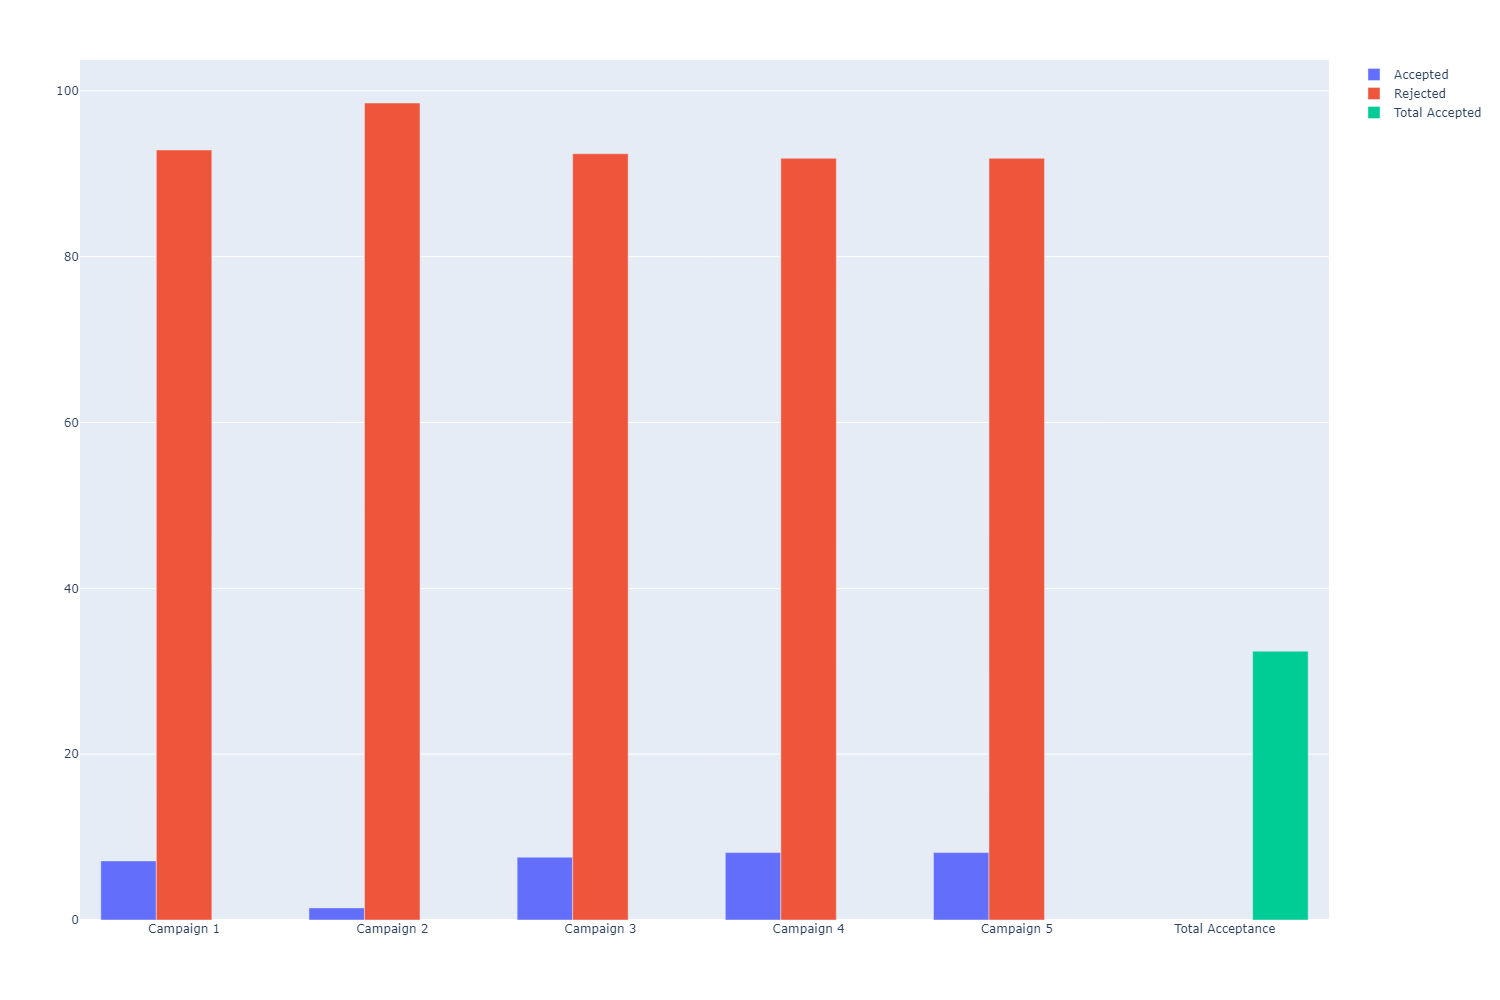

In [27]:
def percen(x):
    x=x/df1['AcceptedCmp1'].loc[df1['Country']=='SP'].count() 
    return x*100
dfSP=df1.loc[df1['Country']=='SP']  
dftemp=dfSP.loc[dfSP['AcceptedCmp1']==1].count()
AcceptedValues=[percen(dfSP['AcceptedCmp1'].loc[dfSP['AcceptedCmp1']==1].count()),
               percen(dfSP['AcceptedCmp1'].loc[dfSP['AcceptedCmp2']==1].count()),
               percen(dfSP['AcceptedCmp1'].loc[dfSP['AcceptedCmp3']==1].count()),
               percen(dfSP['AcceptedCmp1'].loc[dfSP['AcceptedCmp4']==1].count()),
               percen(dfSP['AcceptedCmp1'].loc[dfSP['AcceptedCmp5']==1].count())]
NotAcceptedValues=[percen(dfSP['AcceptedCmp1'].loc[dfSP['AcceptedCmp1']==0].count()),
                  percen(dfSP['AcceptedCmp1'].loc[dfSP['AcceptedCmp2']==0].count()),
                  percen(dfSP['AcceptedCmp1'].loc[dfSP['AcceptedCmp3']==0].count()),
                  percen(dfSP['AcceptedCmp1'].loc[dfSP['AcceptedCmp4']==0].count()),
                  percen(dfSP['AcceptedCmp1'].loc[dfSP['AcceptedCmp5']==0].count())]

fig=px.box()
labels = ['Campaign 1','Campaign 2','Campaign 3','Campaign 4','Campaign 5']
fig.add_trace(go.Bar(x=labels, y=np.array(AcceptedValues), name='Accepted'))
fig.add_trace(go.Bar(x=labels, y=np.array(NotAcceptedValues), name='Rejected'))
fig.add_trace(go.Bar(x=['Total Acceptance'],y=np.array(sum(AcceptedValues)),name='Total Accepted'))
fig.write_image("SPCAM.png", width=1500, height=1000)
Image(filename='SPCAM.png')
 

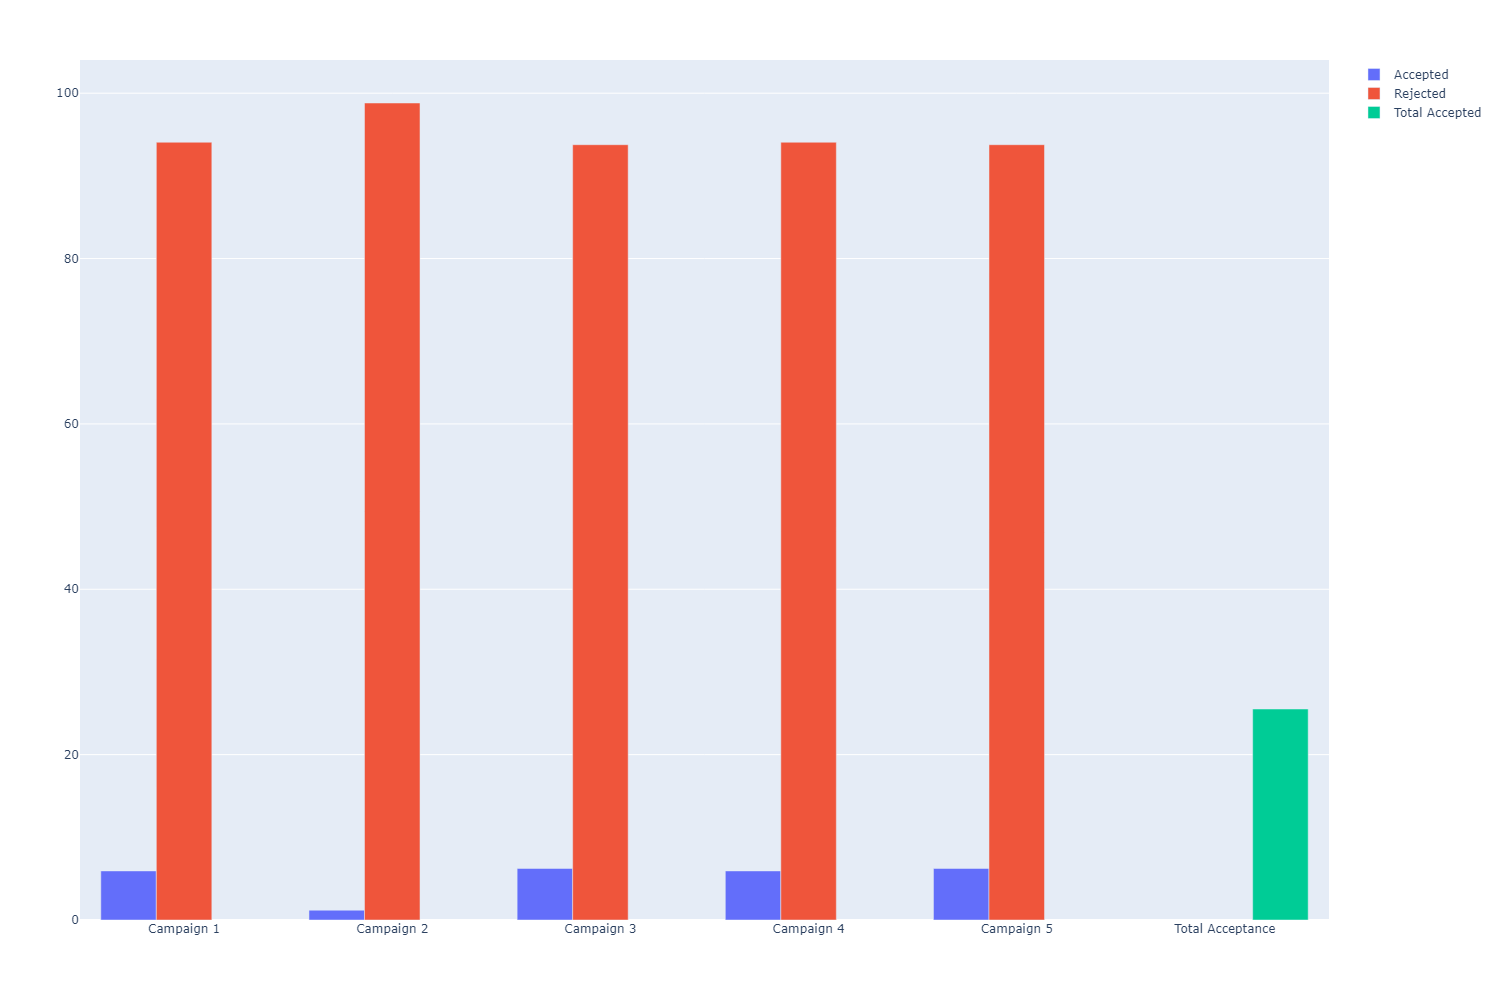

In [28]:
def percen(x):
    x=x/df1['AcceptedCmp1'].loc[df1['Country']=='SA'].count() 
    return x*100
dfSP=df1.loc[df1['Country']=='SA']  
dftemp=dfSP.loc[dfSP['AcceptedCmp1']==1].count()
AcceptedValues=[percen(dfSP['AcceptedCmp1'].loc[dfSP['AcceptedCmp1']==1].count()),
               percen(dfSP['AcceptedCmp1'].loc[dfSP['AcceptedCmp2']==1].count()),
               percen(dfSP['AcceptedCmp1'].loc[dfSP['AcceptedCmp3']==1].count()),
               percen(dfSP['AcceptedCmp1'].loc[dfSP['AcceptedCmp4']==1].count()),
               percen(dfSP['AcceptedCmp1'].loc[dfSP['AcceptedCmp5']==1].count())]
NotAcceptedValues=[percen(dfSP['AcceptedCmp1'].loc[dfSP['AcceptedCmp1']==0].count()),
                  percen(dfSP['AcceptedCmp1'].loc[dfSP['AcceptedCmp2']==0].count()),
                  percen(dfSP['AcceptedCmp1'].loc[dfSP['AcceptedCmp3']==0].count()),
                  percen(dfSP['AcceptedCmp1'].loc[dfSP['AcceptedCmp4']==0].count()),
                  percen(dfSP['AcceptedCmp1'].loc[dfSP['AcceptedCmp5']==0].count())]

fig=px.box()
labels = ['Campaign 1','Campaign 2','Campaign 3','Campaign 4','Campaign 5']
fig.add_trace(go.Bar(x=labels, y=np.array(AcceptedValues), name='Accepted'))
fig.add_trace(go.Bar(x=labels, y=np.array(NotAcceptedValues), name='Rejected'))
fig.add_trace(go.Bar(x=['Total Acceptance'],y=np.array(sum(AcceptedValues)),name='Total Accepted'))
fig.write_image("SACAM.png", width=1500, height=1000)
Image(filename='SACAM.png')
 

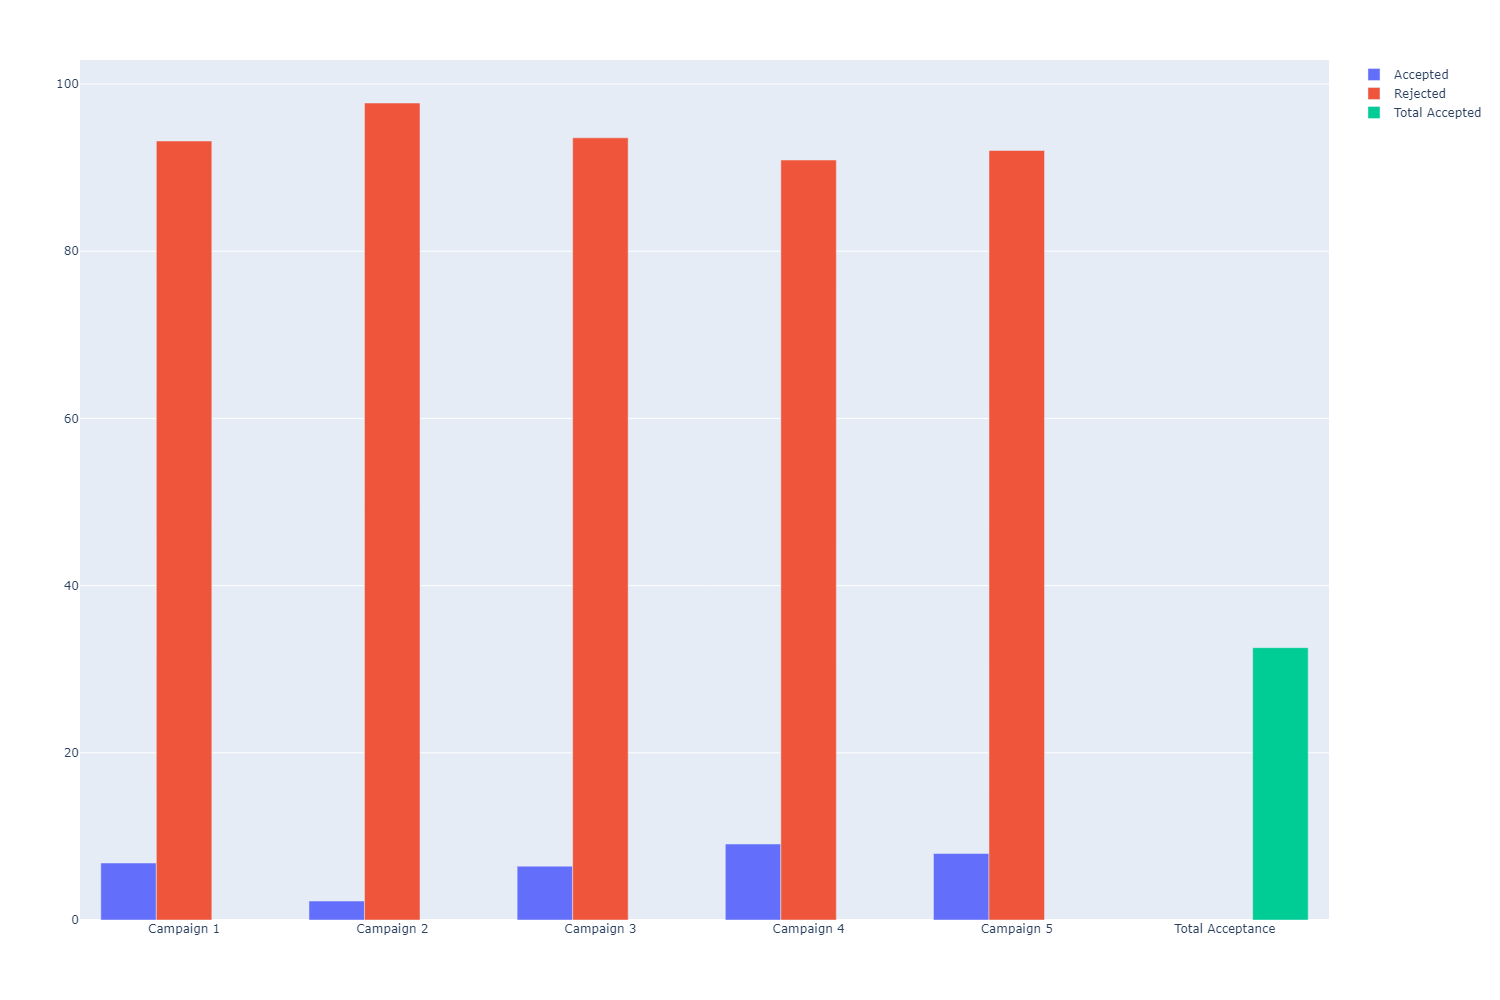

In [29]:
def percen(x):
    x=x/df1['AcceptedCmp1'].loc[df1['Country']=='CA'].count() 
    return x*100
dfSP=df1.loc[df1['Country']=='CA']  
dftemp=dfSP.loc[dfSP['AcceptedCmp1']==1].count()
AcceptedValues=[percen(dfSP['AcceptedCmp1'].loc[dfSP['AcceptedCmp1']==1].count()),
               percen(dfSP['AcceptedCmp1'].loc[dfSP['AcceptedCmp2']==1].count()),
               percen(dfSP['AcceptedCmp1'].loc[dfSP['AcceptedCmp3']==1].count()),
               percen(dfSP['AcceptedCmp1'].loc[dfSP['AcceptedCmp4']==1].count()),
               percen(dfSP['AcceptedCmp1'].loc[dfSP['AcceptedCmp5']==1].count())]
NotAcceptedValues=[percen(dfSP['AcceptedCmp1'].loc[dfSP['AcceptedCmp1']==0].count()),
                  percen(dfSP['AcceptedCmp1'].loc[dfSP['AcceptedCmp2']==0].count()),
                  percen(dfSP['AcceptedCmp1'].loc[dfSP['AcceptedCmp3']==0].count()),
                  percen(dfSP['AcceptedCmp1'].loc[dfSP['AcceptedCmp4']==0].count()),
                  percen(dfSP['AcceptedCmp1'].loc[dfSP['AcceptedCmp5']==0].count())]

fig=px.box()
labels = ['Campaign 1','Campaign 2','Campaign 3','Campaign 4','Campaign 5']
fig.add_trace(go.Bar(x=labels, y=np.array(AcceptedValues), name='Accepted'))
fig.add_trace(go.Bar(x=labels, y=np.array(NotAcceptedValues), name='Rejected'))
fig.add_trace(go.Bar(x=['Total Acceptance'],y=np.array(sum(AcceptedValues)),name='Total Accepted'))
fig.write_image("CACAM.png", width=1500, height=1000)
Image(filename='CACAM.png')
 

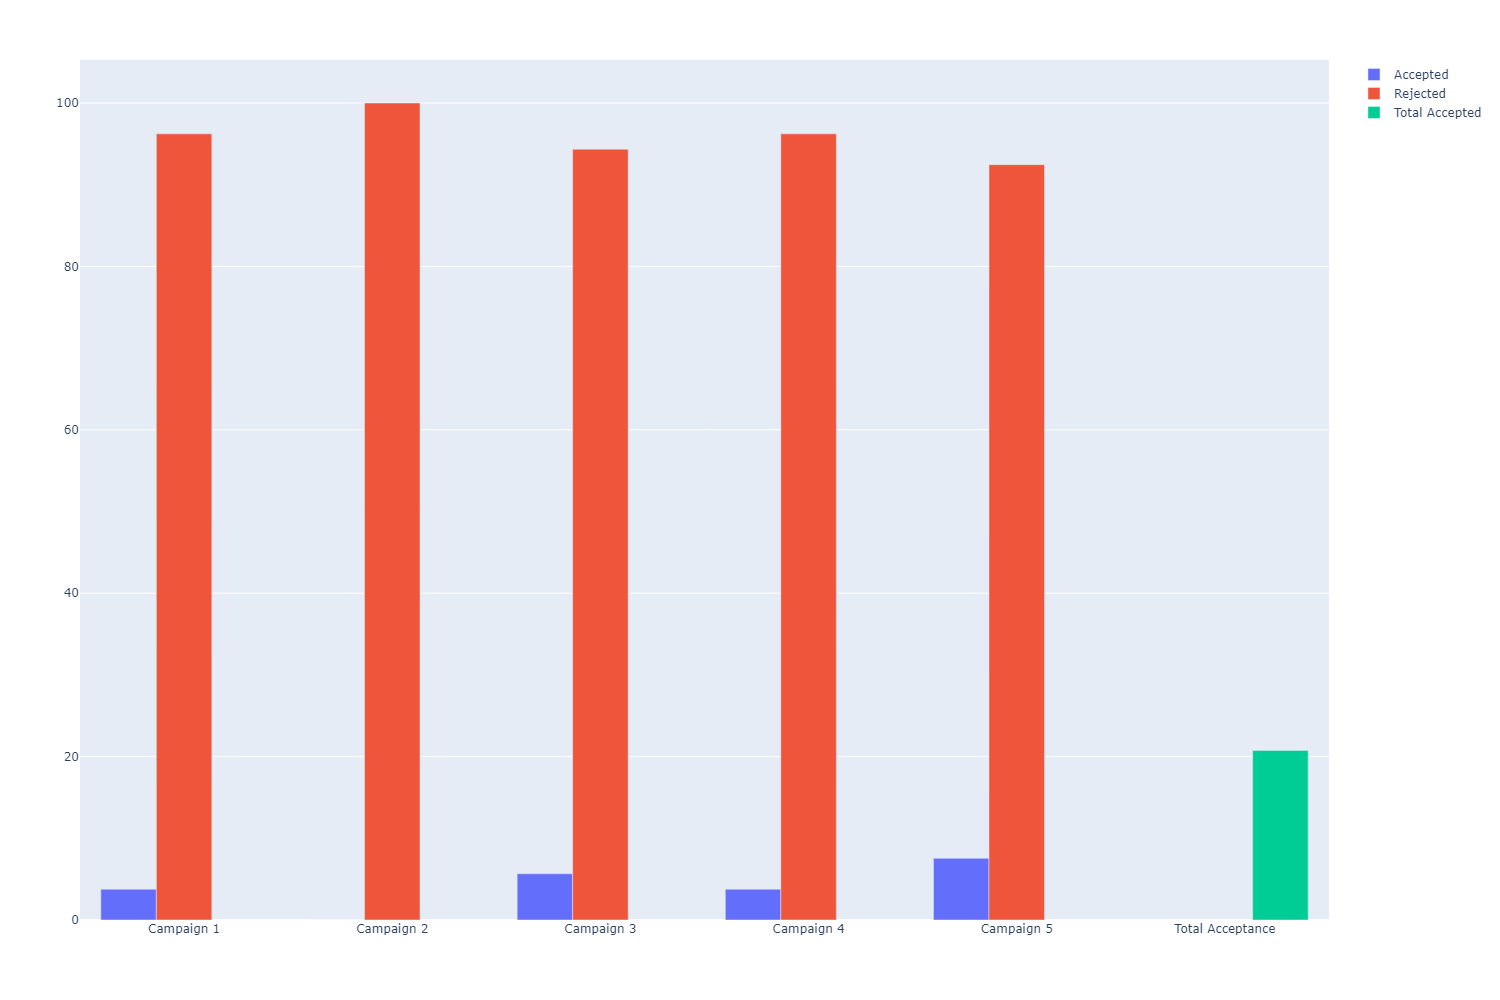

In [30]:
def percen(x):
    x=x/df1['AcceptedCmp1'].loc[df1['Country']=='AUS'].count() 
    return x*100
dfSP=df1.loc[df1['Country']=='AUS']  
dftemp=dfSP.loc[dfSP['AcceptedCmp1']==1].count()
AcceptedValues=[percen(dfSP['AcceptedCmp1'].loc[dfSP['AcceptedCmp1']==1].count()),
               percen(dfSP['AcceptedCmp1'].loc[dfSP['AcceptedCmp2']==1].count()),
               percen(dfSP['AcceptedCmp1'].loc[dfSP['AcceptedCmp3']==1].count()),
               percen(dfSP['AcceptedCmp1'].loc[dfSP['AcceptedCmp4']==1].count()),
               percen(dfSP['AcceptedCmp1'].loc[dfSP['AcceptedCmp5']==1].count())]
NotAcceptedValues=[percen(dfSP['AcceptedCmp1'].loc[dfSP['AcceptedCmp1']==0].count()),
                  percen(dfSP['AcceptedCmp1'].loc[dfSP['AcceptedCmp2']==0].count()),
                  percen(dfSP['AcceptedCmp1'].loc[dfSP['AcceptedCmp3']==0].count()),
                  percen(dfSP['AcceptedCmp1'].loc[dfSP['AcceptedCmp4']==0].count()),
                  percen(dfSP['AcceptedCmp1'].loc[dfSP['AcceptedCmp5']==0].count())]

fig=px.box()
labels = ['Campaign 1','Campaign 2','Campaign 3','Campaign 4','Campaign 5']
fig.add_trace(go.Bar(x=labels, y=np.array(AcceptedValues), name='Accepted'))
fig.add_trace(go.Bar(x=labels, y=np.array(NotAcceptedValues), name='Rejected'))
fig.add_trace(go.Bar(x=['Total Acceptance'],y=np.array(sum(AcceptedValues)),name='Total Accepted'))
fig.write_image("AUSCAM.png", width=1500, height=1000)
Image(filename='AUSCAM.png')
 

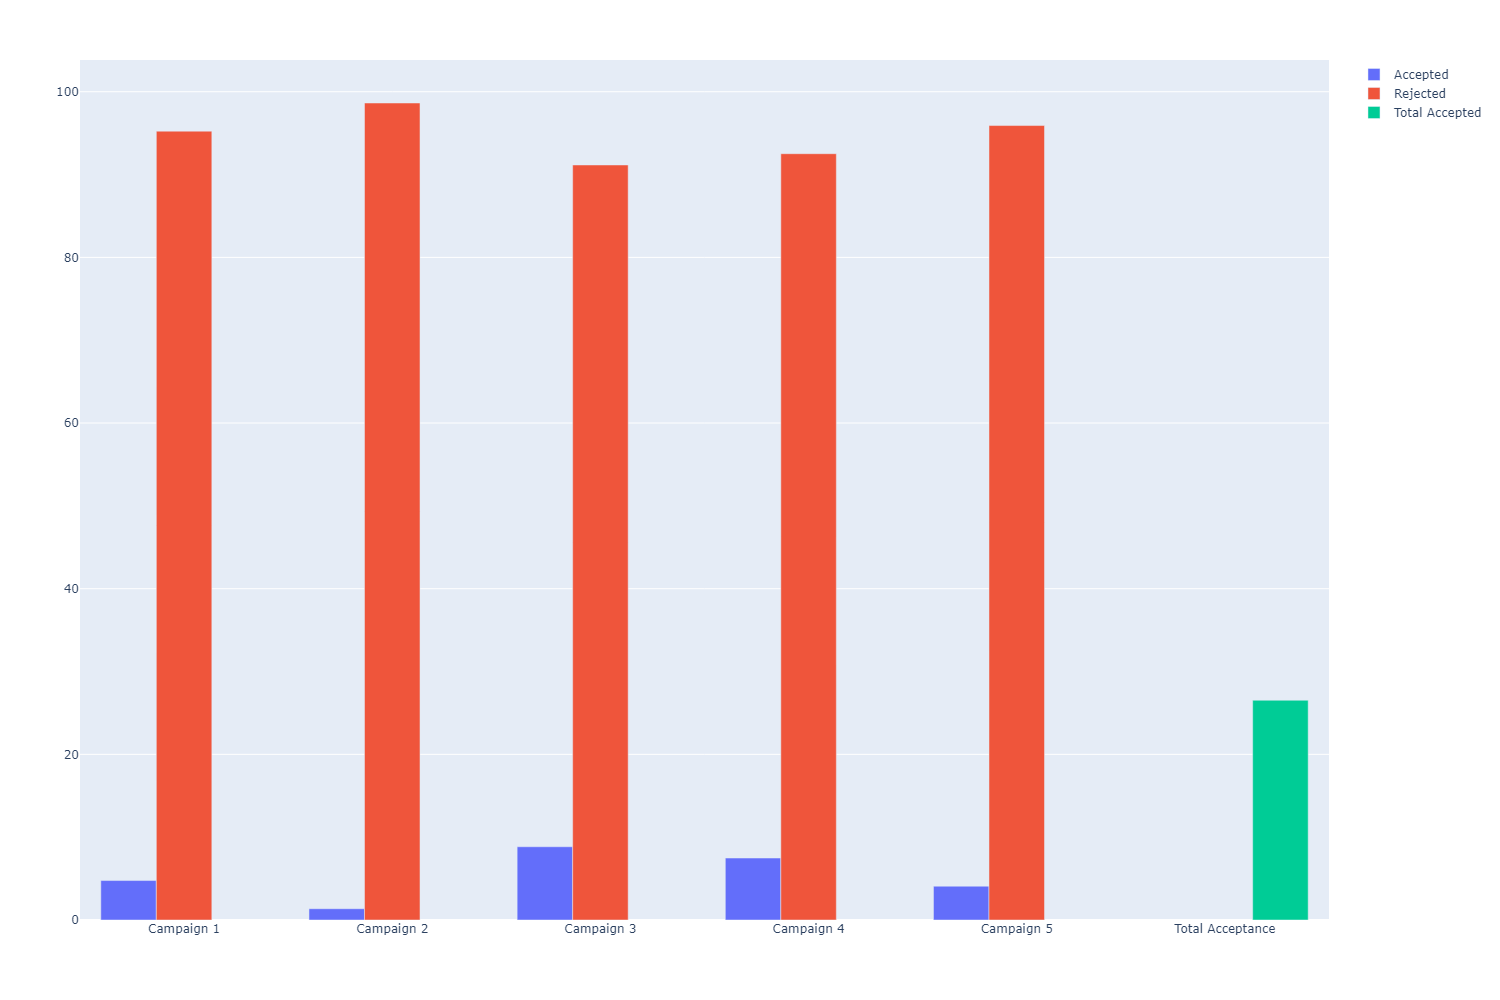

In [31]:
def percen(x):
    x=x/df1['AcceptedCmp1'].loc[df1['Country']=='IND'].count() 
    return x*100
dfSP=df1.loc[df1['Country']=='IND']  
dftemp=dfSP.loc[dfSP['AcceptedCmp1']==1].count()
AcceptedValues=[percen(dfSP['AcceptedCmp1'].loc[dfSP['AcceptedCmp1']==1].count()),
               percen(dfSP['AcceptedCmp1'].loc[dfSP['AcceptedCmp2']==1].count()),
               percen(dfSP['AcceptedCmp1'].loc[dfSP['AcceptedCmp3']==1].count()),
               percen(dfSP['AcceptedCmp1'].loc[dfSP['AcceptedCmp4']==1].count()),
               percen(dfSP['AcceptedCmp1'].loc[dfSP['AcceptedCmp5']==1].count())]
NotAcceptedValues=[percen(dfSP['AcceptedCmp1'].loc[dfSP['AcceptedCmp1']==0].count()),
                  percen(dfSP['AcceptedCmp1'].loc[dfSP['AcceptedCmp2']==0].count()),
                  percen(dfSP['AcceptedCmp1'].loc[dfSP['AcceptedCmp3']==0].count()),
                  percen(dfSP['AcceptedCmp1'].loc[dfSP['AcceptedCmp4']==0].count()),
                  percen(dfSP['AcceptedCmp1'].loc[dfSP['AcceptedCmp5']==0].count())]

fig=px.box()
labels = ['Campaign 1','Campaign 2','Campaign 3','Campaign 4','Campaign 5']
fig.add_trace(go.Bar(x=labels, y=np.array(AcceptedValues), name='Accepted'))
fig.add_trace(go.Bar(x=labels, y=np.array(NotAcceptedValues), name='Rejected'))
fig.add_trace(go.Bar(x=['Total Acceptance'],y=np.array(sum(AcceptedValues)),name='Total Accepted'))
fig.write_image("INDCAM.png", width=1500, height=1000)
Image(filename='INDCAM.png')
 